In [281]:
!pip3 install scikit-posthocs

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import f_oneway

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene, shapiro
import scikit_posthocs as sp
from scipy.stats import kruskal

In [301]:
model_to_name = {
    "7_5": "SRF+STT-SG mixed",
    "7_6": "Mixed + STT-SG FT",
    "9_2": "STT4SG-only"
}

In [302]:
def load_dataframe(model: str, eval_type: str) -> pd.DataFrame:
    """
    The last row has the average and median values, as such we need to drop them to have clean df's
    """
    df = pd.read_excel("XTTS_Evaluation.xlsx", sheet_name=f"{model}_{eval_type}")
    df = df.iloc[:-2]
    
    df["eval_type"] = eval_type
    df["model"] = model_to_name[model]
    
    return df

In [303]:
def group_by_dialect(df: pd.DataFrame, lower: bool = True) -> pd.DataFrame:
    if lower:
        metrics = [
            'wer_lower', 'cer_lower', 'bert_score', 'bleu_score_lower'
        ]
    else:
        metrics = [
            'wer', 'cer', 'bert_score', 'bleu_score'
        ]

    # Group by 'dialect' and calculate average, median, and std for each metric
    # aggregated_stats = df.groupby('dialect')[metrics].agg(['mean', 'median', 'std'])
    aggregated_stats = df.groupby('dialect')[metrics].agg(['mean', 'std'])
    for metric in metrics:
        aggregated_stats[(metric, 'mean')] = aggregated_stats[(metric, 'mean')].round(3)
        aggregated_stats[(metric, 'std')] = aggregated_stats[(metric, 'std')].round(2)
        

    print(df.groupby('dialect').size()[0])
    #latex_table = aggregated_stats.to_latex(index=False)

    # Print the LaTeX table
    # print(latex_table)
    
    # Display the result
    return aggregated_stats

In [435]:
def group_by_speaker(df: pd.DataFrame, lower: bool = True) -> pd.DataFrame:
    if lower:
        metrics = [
            'wer_lower', 'cer_lower', 'bert_score', 'bleu_score_lower'
        ]
    else:
        metrics = [
            'wer', 'cer', 'bert_score', 'bleu_score'
        ]

    # Group by 'dialect' and calculate average, median, and std for each metric
    # aggregated_stats = df.groupby('dialect')[metrics].agg(['mean', 'median', 'std'])
    aggregated_stats = df.groupby(['dialect', 'speaker_id', 'model'])[metrics].agg(['mean','std'])
    for metric in metrics:
        aggregated_stats[(metric, 'mean')] = aggregated_stats[(metric, 'mean')].round(3)
        aggregated_stats[(metric, 'std')] = aggregated_stats[(metric, 'std')].round(2)
        
#     for dialect in df["dialect"].unique():
#         x = []
#         for speaker in df["speaker_id"].unique():
#             s = df[(df['speaker_id'] == speaker) & (df['dialect'] == dialect)]
#             if len(s) >= 1:
#                 x.append(s[metrics + ["speaker_id"]])

#         s = []
#         y = {metric: [] for metric in metrics}
#         for entry in x:
#             s.extend(entry["speaker_id"].values)  # Append speaker IDs for each entry
#             for metric in metrics:
#                 y[metric].extend(entry[metric].values)  # Append metric values for each metric

#         for metric in metrics:
#             f_statistic, p_value = f_oneway(*[entry[metric].values for entry in x])
        
#             if p_value < 0.05:
#                 print(f"Significant differences between speakers in dialect: {dialect} and metric: {metric}")
#                 print(f"Post-hoc analysis for {metric}:")
#                 tukey = pairwise_tukeyhsd(y[metric], s, alpha=0.05)
#                 print(tukey)
#                 print("\n")

#                 plt.figure(figsize=(8, 5))
#                 sns.boxplot(x='model', y=metric, data=df, palette='muted')
#                 plt.title(f'Group Comparison for {metric}')
#                 plt.xlabel('Group')
#                 plt.ylabel(metric)
#                 plt.show()
    #print(aggregated_stats.to_latex(index=True))
    # Display the result
    return aggregated_stats

In [328]:
# def group_by_speaker(df: pd.DataFrame, lower: bool = True) -> pd.DataFrame:
#     if lower:
#         metrics = [
#             'wer_lower', 'cer_lower', 'bert_score', 'bleu_score_lower'
#         ]
#     else:
#         metrics = [
#             'wer', 'cer', 'bert_score', 'bleu_score'
#         ]

#     # Group by 'dialect' and calculate average, median, and std for each metric
#     # aggregated_stats = df.groupby('dialect')[metrics].agg(['mean', 'median', 'std'])
#     aggregated_stats = df.groupby(['dialect', 'model'])[metrics].agg(['mean', 'std'])
#     for metric in metrics:
#         aggregated_stats[(metric, 'mean')] = aggregated_stats[(metric, 'mean')].round(3)
#         aggregated_stats[(metric, 'std')] = aggregated_stats[(metric, 'std')].round(2)
        
#     # Iterate over each dialect and perform statistical tests
#     for dialect in df["dialect"].unique():
#         print(f"\nDialect: {dialect}")

#         # Filter data for this dialect
#         dialect_data = df[df["dialect"] == dialect]

#         for metric in metrics:
#             print(f"\nMetric: {metric}")
            
#             # Test homogeneity of variance (Levene's test)
#             stat, p = levene(*[dialect_data[dialect_data["model"] == model][metric] for model in dialect_data["model"].unique()])
#             print(f"Levene's Test for Homogeneity of Variance: p={p:.4f}")
#             levene_below_0_05 = p <= 0.05

#             # Test normality for each group (Shapiro-Wilk test)
#             shapiro_any_under_p = False
#             for model in dialect_data["model"].unique():
#                 stat, p = shapiro(dialect_data[dialect_data["model"] == model][metric])
#                 print(f"Shapiro-Wilk Test for Normality ({model}): p={p:.4f}")
#                 if p <= 0.05:
#                     shapiro_any_under_p = True
#             print(f"levene_below_0_05={levene_below_0_05} shapiro_any_under_p={shapiro_any_under_p}")
            
#             # Prepare data for the statistical test
#             groups = [dialect_data[dialect_data["model"] == model][metric] for model in dialect_data["model"].unique()]

#             # Perform ANOVA
#             if not levene_below_0_05 and not shapiro_any_under_p:
#                 f_stat, p_value = f_oneway(*groups)
#                 print(f"ANOVA Results: F={f_stat:.4f}, p={p_value:.4f}")
#             else:
#                 f_stat, p_value = kruskal(*groups)
#                 print(f"kruskal Results: F={f_stat:.4f}, p={p_value:.4f}")


#             if p_value < 0.05:  # Significant differences exist
#                 print("Significant differences found. Performing Tukey HSD...")

#                 # Flatten data for Tukey HSD
#                 flattened_data = dialect_data[metric]
#                 group_labels = dialect_data["model"]

#                 if not levene_below_0_05 and not shapiro_any_under_p:
#                     # Tukey HSD
#                     tukey = pairwise_tukeyhsd(flattened_data, group_labels, alpha=0.05)
#                     print("Tukey")
#                     print(tukey)
#                 else:
#                     # Dunn's post-hoc test
#                     dunn = sp.posthoc_dunn(dialect_data, val_col=metric, group_col='model', p_adjust='bonferroni')
#                     print("Dunn")
#                     print(dunn)

#                 plt.figure(figsize=(8, 5))
#                 sns.boxplot(x="model", y=metric, data=dialect_data, palette="muted")
#                 plt.title(f"Model Comparison for {metric} in Dialect: {dialect}")
#                 plt.xlabel("Model")
#                 plt.ylabel(metric)
#                 plt.show()

#     # Display the result
#     return aggregated_stats

In [325]:
def group_by_system(df: pd.DataFrame, lower: bool = True) -> pd.DataFrame:
    # 'wer_lower', 'mer_lower', 'wil_lower', 'cer_lower', 'bert_score', 'bleu_score_lower'
    if lower:
        metrics = [
            'wer_lower', 'cer_lower', 'bert_score', 'bleu_score_lower'
        ]
    else:
        metrics = [
            'wer', 'cer', 'bert_score', 'bleu_score'
        ]
    
    
    
    # Group by 'dialect' and calculate average, median, and std for each metric
    # aggregated_stats = df.groupby('model')[metrics].agg(['mean', 'median', 'std'])
    aggregated_stats = df.groupby('model')[metrics].agg(['mean', 'std'])
    for metric in metrics:
        aggregated_stats[(metric, 'mean')] = aggregated_stats[(metric, 'mean')].round(3)
        aggregated_stats[(metric, 'std')] = aggregated_stats[(metric, 'std')].round(2)


    # Reset index for better readability (optional)
    aggregated_stats = aggregated_stats.reset_index()
    print(df.groupby('model').size()[0])
    

    for metric in metrics:
        # Separate the data into groups
        group_a = df[df['model'] == 'SRF+STT-SG mixed'][metric]
        group_b = df[df['model'] == 'Mixed + STT-SG FT'][metric]
        group_c = df[df['model'] == 'STT4SG-only'][metric]
        
        # Test homogeneity of variance (Levene's test)
        stat, p = levene(*[df[df["model"] == model][metric] for model in df["model"].unique()])
        print(f"Levene's Test for Homogeneity of Variance: p={p:.4f}")
        levene_below_0_05 = p <= 0.05

        # Test normality for each group (Shapiro-Wilk test)
        shapiro_any_under_p = False
        for model in df["model"].unique():
            stat, p = shapiro(df[df["model"] == model][metric])
            print(f"Shapiro-Wilk Test for Normality ({model}): p={p:.4f}")
            if p <= 0.05:
                shapiro_any_under_p = True
        print(f"levene_below_0_05={levene_below_0_05} shapiro_any_under_p={shapiro_any_under_p}")
        
        # Perform one-way ANOVA
        
        # Perform ANOVA
        if not levene_below_0_05 and not shapiro_any_under_p:
            f_stat, p_value = f_oneway(group_a, group_b, group_c)
            print(f"ANOVA Results: F={f_stat:.4f}, p={p_value:.4f}")
        else:
            f_stat, p_value = kruskal(group_a, group_b, group_c)
            print(f"kruskal Results: F={f_stat:.4f}, p={p_value:.4f}")

        # Print the results
        print(f"Metric: {metric}")
        print(f"F-statistic: {f_stat}")
        print(f"P-value: {p_value}")
        print()
        if p_value <= 0.05:
            
            # Perform Tukey's HSD for each significant metric
            print(f"Post-hoc analysis for {metric}:")
            if not levene_below_0_05 and not shapiro_any_under_p:
                dunn = sp.posthoc_dunn(dialect_data, val_col=metric, group_col='model', p_adjust='bonferroni')
                print("Dunn results")
                print(dunn)
                print("\n")
            else:
                tukey = pairwise_tukeyhsd(df[metric], df['model'], alpha=0.05)
                print("Tukey results")
                print(tukey)
                print("\n")

            plt.figure(figsize=(8, 5))
            sns.boxplot(x='model', y=metric, data=df, palette='muted')
            plt.title(f'Group Comparison for {metric}')
            plt.xlabel('Group')
            plt.ylabel(metric)
            plt.show()
    
    # Display the result
    return aggregated_stats

# 1. SNF Short

In [307]:
df_snf_short_7_5 = load_dataframe(model="7_5", eval_type="SNF_short")
df_snf_short_7_6 = load_dataframe(model="7_6", eval_type="SNF_short")
df_snf_short_9_2 = load_dataframe(model="9_2", eval_type="SNF_short")

snf_short = pd.concat([df_snf_short_7_5, df_snf_short_7_6, df_snf_short_9_2], ignore_index=True)

In [308]:
df_snf_short_9_2.head()

,hypothesis,reference,dialect,sample_id,snf_sample_id,speaker_id,token_count_ref,wer,wer_lower,mer,mer_lower,wil,wil_lower,cer,cer_lower,bert_score,bleu_score,bleu_score_lower,eval_type,model
0,obwohl bereits dazumals nicht der reiche von d...,"Obwohl bereits dannzumal das ""Nichterreichen"" ...",Ostschweiz,13.0,cc78a0dafea00fd9d7f83f9f327ae3de3f8a450ae15d3f...,684dd9cf-2844-407b-9a7f-12e7b559773f,14.0,0.727273,0.636364,0.615385,0.538462,0.825175,0.748252,0.218391,0.183908,0.787405,3.374479e-78,3.908633e-78,SNF_short,STT4SG-only
1,...,Er hinterlässt eine Frau und einen Sohn.,Graubünden,7.0,3f11842737ac5a6afbc0c694dfcc928d88f72db0d7a86b...,031b0a74-5bdd-47e7-b8b7-9bb58d0e8c72,8.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.975000,0.975000,0.594217,0.000000e+00,0.000000e+00,SNF_short,STT4SG-only
2,Die Menziokrüsliobke,Diese müssen sie an grössere abgeben.,Innerschweiz,2.0,ff7d08ad3a21f149b7ce954a35c916ca4b629d67fec434...,acf67674-c912-42c0-ba3c-f85e2db965ac,7.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.702703,0.675676,0.608251,0.000000e+00,0.000000e+00,SNF_short,STT4SG-only
3,Sie zeigen die beiden Entführten vor einem gro...,Sie zeigen die beiden Entführten vor einem gro...,Graubünden,10.0,de69bd12b304e8923568d078d45d04beca0dca5436a6f5...,c4f6bcdf-fc02-4fe8-9277-0701cfffebab,12.0,0.090909,0.090909,0.090909,0.090909,0.173554,0.173554,0.026316,0.026316,0.990442,7.016879e-01,7.016879e-01,SNF_short,STT4SG-only
4,"Er hängt not, ihr Frau und ihr Sohn hier.",Er hinterlässt eine Frau und einen Sohn.,Basel,7.0,3f11842737ac5a6afbc0c694dfcc928d88f72db0d7a86b...,1cd99b41-8298-4180-aec6-bb65039c9ed7,8.0,0.857143,0.857143,0.666667,0.666667,0.857143,0.857143,0.525000,0.525000,0.751933,6.739372e-155,6.739372e-155,SNF_short,STT4SG-only


## 1.2 Dialect Based

In [199]:
group_by_dialect(df_snf_short_7_5)

15


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.476  0.32     0.280  0.28      0.887  0.07   
Bern             0.789  0.55     0.473  0.43      0.793  0.12   
Graubünden       0.503  0.42     0.271  0.29      0.852  0.11   
Innerschweiz     0.558  0.37     0.273  0.21      0.862  0.09   
Ostschweiz       0.605  0.42     0.305  0.26      0.830  0.09   
Wallis           0.936  1.06     0.594  0.94      0.803  0.11   
Zürich           0.862  0.67     0.462  0.40      0.814  0.11   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.376  0.35  
Bern                    0.267  0.30  
Graubünden              0.413  0.38  
Innerschweiz            0.331  0.38  
Ostschweiz              0.270  0.25  
Wallis                  0.204  0.27  
Zürich                  0.157  0.31

In [176]:
group_by_dialect(df_snf_short_7_6)

15


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.604  0.31     0.261  0.18      0.827  0.11   
Bern             0.475  0.31     0.224  0.17      0.851  0.11   
Graubünden       0.460  0.22     0.216  0.15      0.856  0.09   
Innerschweiz     0.364  0.31     0.166  0.18      0.905  0.08   
Ostschweiz       0.521  0.34     0.228  0.20      0.857  0.12   
Wallis           0.629  0.23     0.300  0.14      0.796  0.08   
Zürich           0.610  0.36     0.281  0.17      0.818  0.11   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.184  0.26  
Bern                    0.313  0.35  
Graubünden              0.273  0.23  
Innerschweiz            0.401  0.38  
Ostschweiz              0.267  0.29  
Wallis                  0.133  0.23  
Zürich                  0.174  0.29

In [177]:
group_by_dialect(df_snf_short_9_2)

15


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.688  0.31     0.304  0.17      0.812  0.11   
Bern             0.628  0.31     0.361  0.26      0.789  0.13   
Graubünden       0.463  0.31     0.234  0.25      0.861  0.12   
Innerschweiz     0.426  0.32     0.174  0.16      0.882  0.10   
Ostschweiz       0.485  0.26     0.221  0.16      0.858  0.11   
Wallis           0.706  0.32     0.353  0.18      0.789  0.11   
Zürich           0.629  0.28     0.301  0.15      0.819  0.10   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.152  0.28  
Bern                    0.190  0.28  
Graubünden              0.334  0.29  
Innerschweiz            0.277  0.34  
Ostschweiz              0.262  0.27  
Wallis                  0.129  0.20  
Zürich                  0.140  0.22

## 1.3 System based

105
Levene's Test for Homogeneity of Variance: p=0.0031
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0035
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0007
levene_below_0_05=True shapiro_any_under_p=True
kruskal Results: F=2.4344, p=0.2961
Metric: wer_lower
F-statistic: 3.425913669435737
P-value: 0.03374789308993493

Post-hoc analysis for wer_lower:
Tukey results
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed   0.1523 0.0283   0.013 0.2917   True
Mixed + STT-SG FT      STT4SG-only   0.0517 0.6572 -0.0877 0.1911  False
 SRF+STT-SG mixed      STT4SG-only  -0.1006 0.2068   -0.24 0.0388  False
------------------------------------------------------------------------




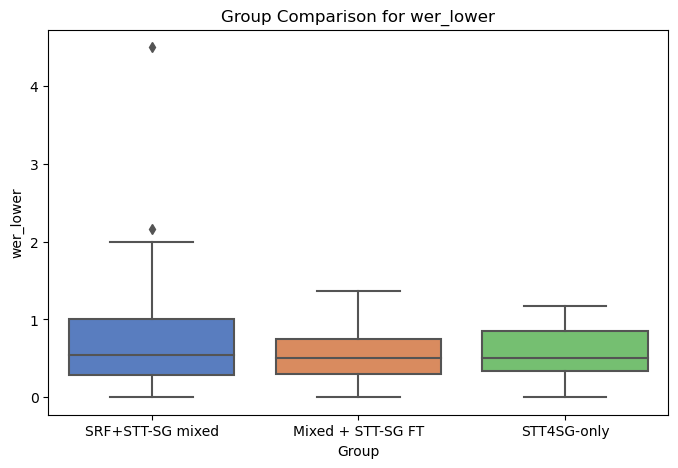

Levene's Test for Homogeneity of Variance: p=0.0013
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0002
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=True shapiro_any_under_p=True
kruskal Results: F=3.8928, p=0.1428
Metric: cer_lower
F-statistic: 5.771804555714458
P-value: 0.003456176040767816

Post-hoc analysis for cer_lower:
Tukey results
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed   0.1403 0.0032  0.0399 0.2407   True
Mixed + STT-SG FT      STT4SG-only   0.0389 0.6332 -0.0615 0.1393  False
 SRF+STT-SG mixed      STT4SG-only  -0.1014 0.0471 -0.2018 -0.001   True
------------------------------------------------------------------------




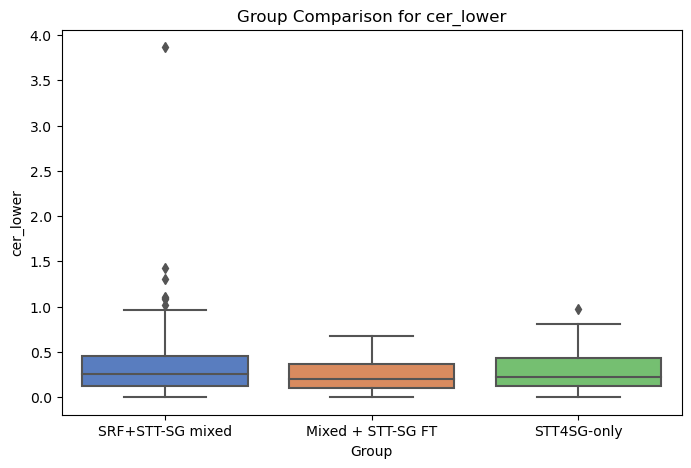

Levene's Test for Homogeneity of Variance: p=0.3041
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0297
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0016
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0001
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=0.8359, p=0.6584
Metric: bert_score
F-statistic: 0.5054537145011027
P-value: 0.6037249160714766

Levene's Test for Homogeneity of Variance: p=0.2118
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=2.5107, p=0.2850
Metric: bleu_score_lower
F-statistic: 1.7227510126320447
P-value: 0.18026846580467298



model wer_lower       cer_lower       bert_score        \
                          mean   std      mean   std       mean   std   
0  Mixed + STT-SG FT     0.523  0.31     0.240  0.17      0.844  0.10   
1   SRF+STT-SG mixed     0.676  0.60     0.380  0.47      0.834  0.10   
2        STT4SG-only     0.575  0.31     0.278  0.20      0.830  0.11   

  bleu_score_lower        
              mean   std  
0            0.249  0.30  
1            0.288  0.32  
2            0.212  0.27

In [331]:
group_by_system(snf_short)

## 1.4 Speaker based

In [332]:
group_by_speaker(snf_short)


Dialect: Ostschweiz

Metric: wer_lower
Levene's Test for Homogeneity of Variance: p=0.6805
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0024
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0758
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.6707
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=0.6609, p=0.7186

Metric: cer_lower
Levene's Test for Homogeneity of Variance: p=0.7892
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0010
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0156
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0377
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=1.8474, p=0.3970

Metric: bert_score
Levene's Test for Homogeneity of Variance: p=0.4600
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.3120
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0402
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0149
levene_below_0_05=False shapiro_any_under_p=True
kruskal R

wer_lower       cer_lower       bert_score  \
                                    mean   std      mean   std       mean   
dialect      model                                                          
Basel        Mixed + STT-SG FT     0.604  0.31     0.261  0.18      0.827   
             SRF+STT-SG mixed      0.476  0.32     0.280  0.28      0.887   
             STT4SG-only           0.688  0.31     0.304  0.17      0.812   
Bern         Mixed + STT-SG FT     0.475  0.31     0.224  0.17      0.851   
             SRF+STT-SG mixed      0.789  0.55     0.473  0.43      0.793   
             STT4SG-only           0.628  0.31     0.361  0.26      0.789   
Graubünden   Mixed + STT-SG FT     0.460  0.22     0.216  0.15      0.856   
             SRF+STT-SG mixed      0.503  0.42     0.271  0.29      0.852   
             STT4SG-only           0.463  0.31     0.234  0.25      0.861   
Innerschweiz Mixed + STT-SG FT     0.364  0.31     0.166  0.18      0.905   
             SRF+STT-SG mixed      0.558  0.37     0.273  0.21      0.862   
             STT4SG-only           0.426  0.32     0.174  0.16      0.882   
Ostschweiz   Mixed + STT-SG FT     0.521  0.34     0.228  0.20      0.857   
             SRF+STT-SG mixed      0.605  0.42     0.305  0.26      0.830   
             STT4SG-only           0.485  0.26     0.221  0.16      0.858   
Wallis       Mixed + STT-SG FT     0.629  0.23     0.300  0.14      0.796   
             SRF+STT-SG mixed      0.936  1.06     0.594  0.94      0.803   
             STT4SG-only           0.706  0.32     0.353  0.18      0.789   
Zürich       Mixed + STT-SG FT     0.610  0.36     0.281  0.17      0.818   
             SRF+STT-SG mixed      0.862  0.67     0.462  0.40      0.814   
             STT4SG-only           0.629  0.28     0.301  0.15      0.819   

                                     bleu_score_lower        
                                 std             mean   std  
dialect      model                                           
Basel        Mixed + STT-SG FT  0.11            0.184  0.26  
             SRF+STT-SG mixed   0.07            0.376  0.35  
             STT4SG-only        0.11            0.152  0.28  
Bern         Mixed + STT-SG FT  0.11            0.313  0.35  
             SRF+STT-SG mixed   0.12            0.267  0.30  
             STT4SG-only        0.13            0.190  0.28  
Graubünden   Mixed + STT-SG FT  0.09            0.273  0.23  
             SRF+STT-SG mixed   0.11            0.413  0.38  
             STT4SG-only        0.12            0.334  0.29  
Innerschweiz Mixed + STT-SG FT  0.08            0.401  0.38  
             SRF+STT-SG mixed   0.09            0.331  0.38  
             STT4SG-only        0.10            0.277  0.34  
Ostschweiz   Mixed + STT-SG FT  0.12            0.267  0.29  
             SRF+STT-SG mixed   0.09            0.270  0.25  
             STT4SG-only        0.11            0.262  0.27  
Wallis       Mixed + STT-SG FT  0.08            0.133  0.23  
             SRF+STT-SG mixed   0.11            0.204  0.27  
             STT4SG-only        0.11            0.129  0.20  
Zürich       Mixed + STT-SG FT  0.11            0.174  0.29  
             SRF+STT-SG mixed   0.11            0.157  0.31  
             STT4SG-only        0.10            0.140  0.22

# 2. SNF Long

In [334]:
df_snf_long_7_5 = load_dataframe(model="7_5", eval_type="SNF_long")
df_snf_long_7_6 = load_dataframe(model="7_6", eval_type="SNF_long")
df_snf_long_9_2 = load_dataframe(model="9_2", eval_type="SNF_long")

snf_long = pd.concat([df_snf_long_7_5, df_snf_long_7_6, df_snf_long_9_2], ignore_index=True)

## 2.1 Unique Sentences

In [ ]:
df_snf_long_7_6 = load_dataframe(model="7_6", eval_type="SNF_long")

In [ ]:
unique_sentences_df = df_snf_long_7_6[['reference', 'token_count_ref']].drop_duplicates(subset='reference')
unique_sentences_df['token_count_ref'] = unique_sentences_df['token_count_ref'].astype(int)

## 2.2 Dialect Based

In [140]:
group_by_dialect(df_snf_long_7_5)

15


dialect wer_lower       cer_lower       bert_score        \
                     mean   std      mean   std       mean   std   
0         Basel     0.430  0.26     0.190  0.14      0.876  0.07   
1          Bern     0.452  0.27     0.231  0.17      0.844  0.09   
2    Graubünden     0.251  0.14     0.112  0.06      0.914  0.05   
3  Innerschweiz     0.364  0.13     0.160  0.06      0.889  0.04   
4    Ostschweiz     0.349  0.23     0.168  0.13      0.890  0.07   
5        Wallis     0.537  0.34     0.304  0.25      0.833  0.10   
6        Zürich     0.507  0.32     0.282  0.26      0.846  0.07   

  bleu_score_lower        
              mean   std  
0            0.453  0.24  
1            0.384  0.27  
2            0.620  0.17  
3            0.481  0.19  
4            0.494  0.29  
5            0.346  0.29  
6            0.364  0.25

In [141]:
group_by_dialect(df_snf_long_7_6)

15


dialect wer_lower       cer_lower       bert_score        \
                     mean   std      mean   std       mean   std   
0         Basel     0.503  0.23     0.239  0.14      0.831  0.10   
1          Bern     0.421  0.26     0.193  0.14      0.859  0.10   
2    Graubünden     0.385  0.20     0.138  0.10      0.882  0.08   
3  Innerschweiz     0.301  0.21     0.119  0.11      0.901  0.07   
4    Ostschweiz     0.379  0.25     0.156  0.12      0.885  0.08   
5        Wallis     0.694  0.19     0.342  0.10      0.778  0.07   
6        Zürich     0.408  0.23     0.178  0.12      0.868  0.08   

  bleu_score_lower        
              mean   std  
0            0.279  0.22  
1            0.392  0.28  
2            0.396  0.27  
3            0.501  0.24  
4            0.442  0.33  
5            0.131  0.15  
6            0.370  0.30

In [142]:
group_by_dialect(df_snf_long_9_2)

15


dialect wer_lower       cer_lower       bert_score        \
                     mean   std      mean   std       mean   std   
0         Basel     0.658  0.18     0.281  0.11      0.791  0.07   
1          Bern     0.516  0.25     0.251  0.17      0.837  0.08   
2    Graubünden     0.342  0.22     0.132  0.09      0.893  0.08   
3  Innerschweiz     0.336  0.16     0.135  0.09      0.880  0.06   
4    Ostschweiz     0.388  0.15     0.154  0.07      0.874  0.06   
5        Wallis     0.713  0.24     0.359  0.16      0.776  0.07   
6        Zürich     0.486  0.24     0.234  0.18      0.841  0.08   

  bleu_score_lower        
              mean   std  
0            0.145  0.16  
1            0.280  0.25  
2            0.465  0.26  
3            0.463  0.19  
4            0.361  0.21  
5            0.150  0.14  
6            0.321  0.19

## 3.3 System based

105
Levene's Test for Homogeneity of Variance: p=0.8911
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0112
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0439
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=6.7986, p=0.0334
Metric: wer_lower
F-statistic: 2.6108181713843033
P-value: 0.07507921177327075

Levene's Test for Homogeneity of Variance: p=0.9493
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0001
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=1.9315, p=0.3807
Metric: cer_lower
F-statistic: 0.7368305830321363
P-value: 0.47945946840722886

Levene's Test for Homogeneity of Variance: p=0.3242
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0012
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0062
Shapiro-Wilk Test for Normali

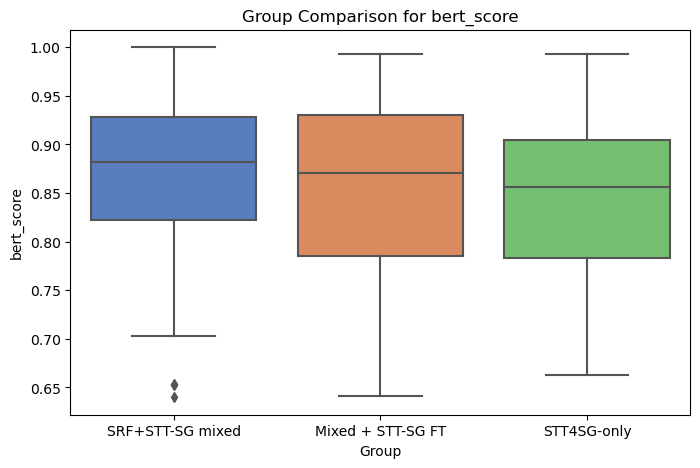

Levene's Test for Homogeneity of Variance: p=0.1417
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0042
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0002
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=16.3430, p=0.0003
Metric: bleu_score_lower
F-statistic: 7.704366193868896
P-value: 0.0005420462671248423

Post-hoc analysis for bleu_score_lower:
Tukey results
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed   0.0903 0.0301   0.007  0.1737   True
Mixed + STT-SG FT      STT4SG-only  -0.0463 0.3918 -0.1297  0.0371  False
 SRF+STT-SG mixed      STT4SG-only  -0.1366 0.0004   -0.22 -0.0533   True
-------------------------------------------------------------------------




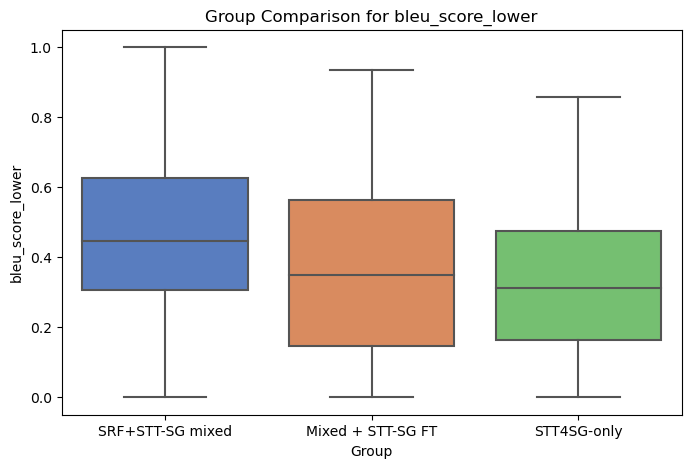

model wer_lower       cer_lower       bert_score        \
                          mean   std      mean   std       mean   std   
0  Mixed + STT-SG FT     0.441  0.25     0.195  0.13      0.858  0.09   
1   SRF+STT-SG mixed     0.413  0.26     0.206  0.18      0.870  0.08   
2        STT4SG-only     0.491  0.25     0.221  0.15      0.842  0.08   

  bleu_score_lower        
              mean   std  
0            0.359  0.28  
1            0.449  0.26  
2            0.312  0.23

In [335]:
group_by_system(snf_long)

## 2.3 Speaker based


Dialect: Ostschweiz

Metric: wer_lower
Levene's Test for Homogeneity of Variance: p=0.1752
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.6296
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.3275
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.6339
levene_below_0_05=False shapiro_any_under_p=False
ANOVA Results: F=0.1306, p=0.8779

Metric: cer_lower
Levene's Test for Homogeneity of Variance: p=0.1914
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.1987
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.2104
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.3991
levene_below_0_05=False shapiro_any_under_p=False
ANOVA Results: F=0.0636, p=0.9384

Metric: bert_score
Levene's Test for Homogeneity of Variance: p=0.3695
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.8258
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.3283
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.8364
levene_below_0_05=False shapiro_any_under_p=False
ANOVA Resu

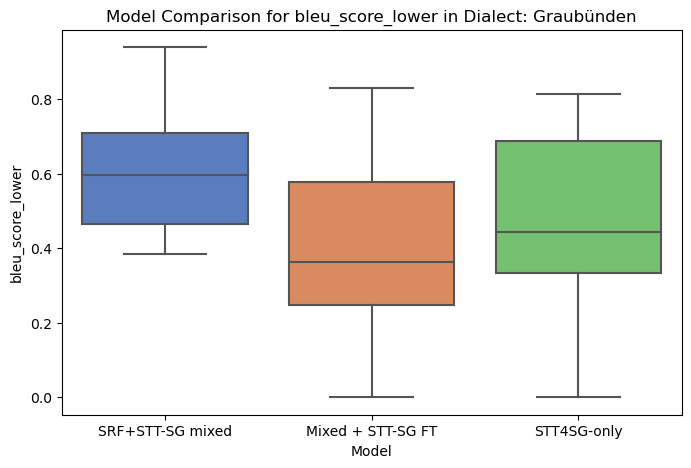


Dialect: Innerschweiz

Metric: wer_lower
Levene's Test for Homogeneity of Variance: p=0.6177
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.8898
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0167
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.9275
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=2.9550, p=0.2282

Metric: cer_lower
Levene's Test for Homogeneity of Variance: p=0.5051
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.9292
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0034
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.5131
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=4.0842, p=0.1298

Metric: bert_score
Levene's Test for Homogeneity of Variance: p=0.2304
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.3443
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0918
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.8031
levene_below_0_05=False shapiro_any_under_p=False
ANOVA 

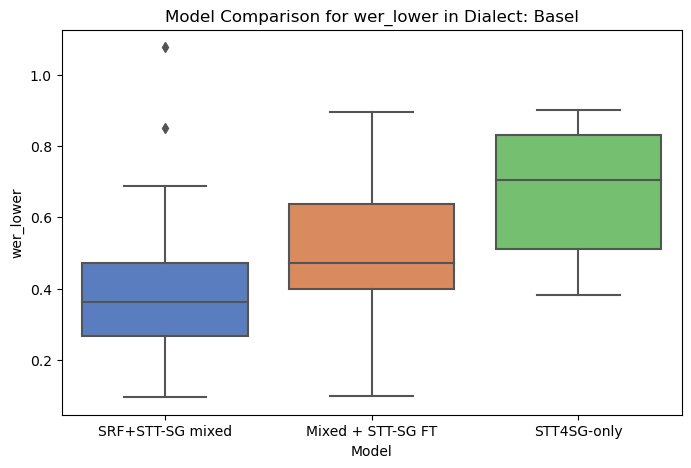


Metric: cer_lower
Levene's Test for Homogeneity of Variance: p=0.8039
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0176
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.1814
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.8527
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=5.0713, p=0.0792

Metric: bert_score
Levene's Test for Homogeneity of Variance: p=0.7509
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.9002
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.2228
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.9616
levene_below_0_05=False shapiro_any_under_p=False
ANOVA Results: F=4.1162, p=0.0233
Significant differences found. Performing Tukey HSD...
Tukey
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed   0.0444 0.2

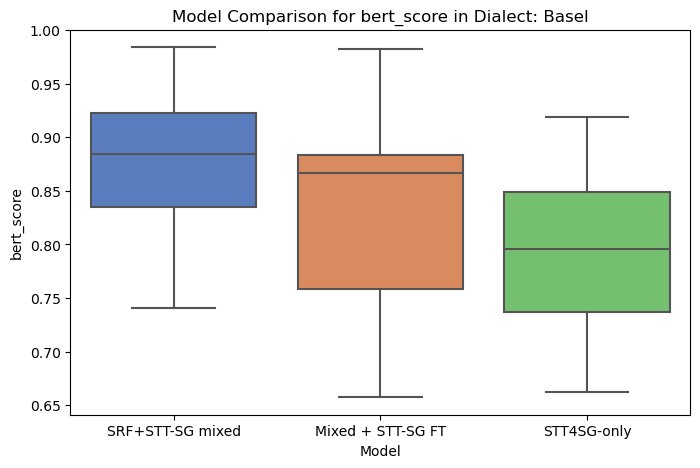


Metric: bleu_score_lower
Levene's Test for Homogeneity of Variance: p=0.6524
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.4717
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.1694
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0112
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=11.8075, p=0.0027
Significant differences found. Performing Tukey HSD...
Dunn
                   Mixed + STT-SG FT  SRF+STT-SG mixed  STT4SG-only
Mixed + STT-SG FT           1.000000          0.135939     0.468662
SRF+STT-SG mixed            0.135939          1.000000     0.001881
STT4SG-only                 0.468662          0.001881     1.000000


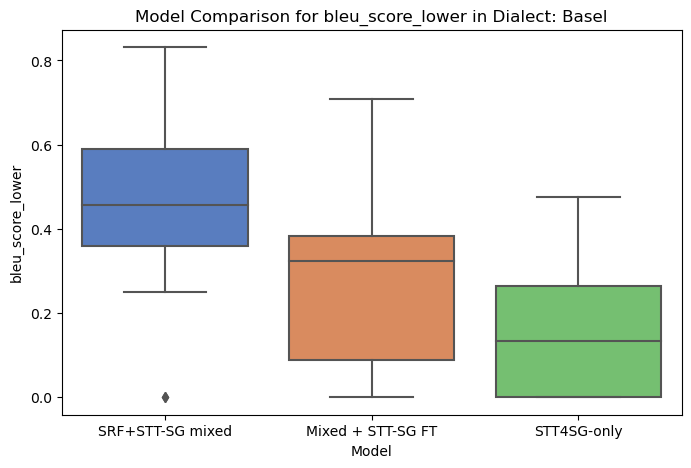


Dialect: Wallis

Metric: wer_lower
Levene's Test for Homogeneity of Variance: p=0.1917
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.3694
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.9230
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.4695
levene_below_0_05=False shapiro_any_under_p=False
ANOVA Results: F=2.0270, p=0.1444

Metric: cer_lower
Levene's Test for Homogeneity of Variance: p=0.1443
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0671
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.1048
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0526
levene_below_0_05=False shapiro_any_under_p=False
ANOVA Results: F=0.3841, p=0.6834

Metric: bert_score
Levene's Test for Homogeneity of Variance: p=0.1816
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.5214
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.3323
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.7707
levene_below_0_05=False shapiro_any_under_p=False
ANOVA Results:

wer_lower       cer_lower       bert_score  \
                                    mean   std      mean   std       mean   
dialect      model                                                          
Basel        Mixed + STT-SG FT     0.503  0.23     0.239  0.14      0.831   
             SRF+STT-SG mixed      0.430  0.26     0.190  0.14      0.876   
             STT4SG-only           0.658  0.18     0.281  0.11      0.791   
Bern         Mixed + STT-SG FT     0.421  0.26     0.193  0.14      0.859   
             SRF+STT-SG mixed      0.452  0.27     0.231  0.17      0.844   
             STT4SG-only           0.516  0.25     0.251  0.17      0.837   
Graubünden   Mixed + STT-SG FT     0.385  0.20     0.138  0.10      0.882   
             SRF+STT-SG mixed      0.251  0.14     0.112  0.06      0.914   
             STT4SG-only           0.342  0.22     0.132  0.09      0.893   
Innerschweiz Mixed + STT-SG FT     0.301  0.21     0.119  0.11      0.901   
             SRF+STT-SG mixed      0.364  0.13     0.160  0.06      0.889   
             STT4SG-only           0.336  0.16     0.135  0.09      0.880   
Ostschweiz   Mixed + STT-SG FT     0.379  0.25     0.156  0.12      0.885   
             SRF+STT-SG mixed      0.349  0.23     0.168  0.13      0.890   
             STT4SG-only           0.388  0.15     0.154  0.07      0.874   
Wallis       Mixed + STT-SG FT     0.694  0.19     0.342  0.10      0.778   
             SRF+STT-SG mixed      0.537  0.34     0.304  0.25      0.833   
             STT4SG-only           0.713  0.24     0.359  0.16      0.776   
Zürich       Mixed + STT-SG FT     0.408  0.23     0.178  0.12      0.868   
             SRF+STT-SG mixed      0.507  0.32     0.282  0.26      0.846   
             STT4SG-only           0.486  0.24     0.234  0.18      0.841   

                                     bleu_score_lower        
                                 std             mean   std  
dialect      model                                           
Basel        Mixed + STT-SG FT  0.10            0.279  0.22  
             SRF+STT-SG mixed   0.07            0.453  0.24  
             STT4SG-only        0.07            0.145  0.16  
Bern         Mixed + STT-SG FT  0.10            0.392  0.28  
             SRF+STT-SG mixed   0.09            0.384  0.27  
             STT4SG-only        0.08            0.280  0.25  
Graubünden   Mixed + STT-SG FT  0.08            0.396  0.27  
             SRF+STT-SG mixed   0.05            0.620  0.17  
             STT4SG-only        0.08            0.465  0.26  
Innerschweiz Mixed + STT-SG FT  0.07            0.501  0.24  
             SRF+STT-SG mixed   0.04            0.481  0.19  
             STT4SG-only        0.06            0.463  0.19  
Ostschweiz   Mixed + STT-SG FT  0.08            0.442  0.33  
             SRF+STT-SG mixed   0.07            0.494  0.29  
             STT4SG-only        0.06            0.361  0.21  
Wallis       Mixed + STT-SG FT  0.07            0.131  0.15  
             SRF+STT-SG mixed   0.10            0.346  0.29  
             STT4SG-only        0.07            0.150  0.14  
Zürich       Mixed + STT-SG FT  0.08            0.370  0.30  
             SRF+STT-SG mixed   0.07            0.364  0.25  
             STT4SG-only        0.08            0.321  0.19

In [336]:
group_by_speaker(snf_long)

Significant differences between speakers in dialect: Zürich and metric: bleu_score_lower
Post-hoc analysis for bleu_score_lower:
                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------
3e7e3ad6-938d-40fa-9787-2e9f8c529a66 4ee1811c-9884-4261-99cb-2f7346c8ea6e  -0.8807 0.0341 -1.6992 -0.0621   True
3e7e3ad6-938d-40fa-9787-2e9f8c529a66 6d34bfbb-2de2-48d9-891d-ae216f9b347b  -0.3099 0.6711  -1.042  0.4223  False
3e7e3ad6-938d-40fa-9787-2e9f8c529a66 9a9554dd-3ee4-4997-82e6-1d78e0ca3d7f  -0.6826 0.2008 -1.6278  0.2625  False
3e7e3ad6-938d-40fa-9787-2e9f8c529a66 ba826a45-33f8-47ef-9516-a66a201aac29  -0.4271 0.4816 -1.2457  0.3914  False
3e7e3ad6-938d-40fa-9787-2e9f8c529a66 ce8839ae-3b20-491c-8c33-cef08b4def6e  -0.70

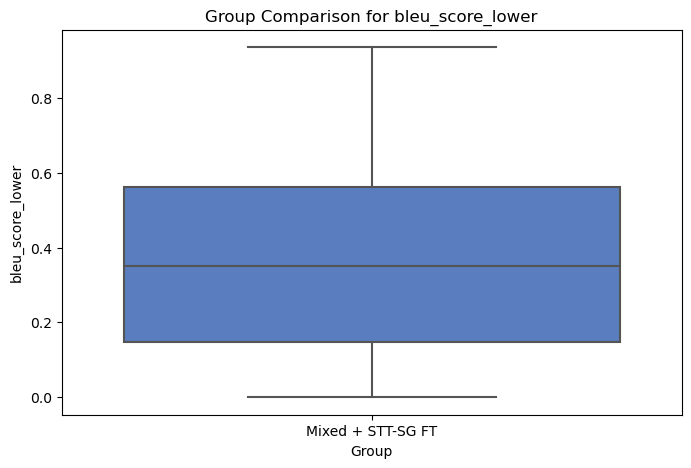

wer_lower       cer_lower  \
                                                       mean   std      mean   
dialect      speaker_id                                                       
Basel        12fb73be-cf60-4794-befb-381682ccda9a     0.432  0.03     0.166   
             1cd99b41-8298-4180-aec6-bb65039c9ed7     0.582  0.23     0.269   
             8050767b-0a0e-43db-8754-2a42e896f7dd     0.647   NaN     0.323   
             8800b4de-fa22-4fdc-9f29-457c4010fd57     0.471   NaN     0.203   
             8f16829d-1a64-4145-927c-d6738a07ea24     0.190   NaN     0.062   
             e903f18d-7bbb-4fb6-aaa3-0f7d965027fb     0.285  0.26     0.116   
             fd72db57-c291-43e6-840e-92e06f83ae56     0.611  0.24     0.324   
Bern         0497b106-6644-42ce-b99e-57f9a6c7fc81     0.336  0.27     0.154   
             24f85b05-10f3-49f3-bfd0-273120e750cb     0.250   NaN     0.107   
             2a4acb33-759e-411f-bbd0-2470080758fb     0.238   NaN     0.075   
             7ca44480-9007-4c1c-8046-aade3c4e6a87     0.410  0.00     0.167   
             887b50f8-215b-4a1d-8f32-13516da6506f     0.471   NaN     0.260   
             ba118975-5963-4495-927a-a78d19dd98c1     0.749  0.13     0.371   
             d2dee463-0eb9-47fa-b739-f1dccd8638f9     0.278  0.32     0.128   
             d9b44aee-da3d-42c8-8ad1-d1029767f05a     0.500   NaN     0.183   
Graubünden   031b0a74-5bdd-47e7-b8b7-9bb58d0e8c72     0.353  0.05     0.101   
             6516567b-0d9b-4853-880c-d5f0327dd384     0.434  0.23     0.173   
             aece75d7-5d2b-47a4-9f87-24962dfd2e38     0.559  0.21     0.225   
             c4f6bcdf-fc02-4fe8-9277-0701cfffebab     0.332  0.30     0.105   
             ce50fa32-dbc4-4f72-bd5f-5128784a5abc     0.476   NaN     0.118   
             d2f85a8f-7c45-48e3-a804-0b192f7f8ad6     0.100   NaN     0.047   
             f2feaf58-1285-4fc1-831d-5c1b013b7e0b     0.190   NaN     0.084   
Innerschweiz 005039b8-898f-48d8-b7cc-8a16bd1055c8     0.418  0.25     0.174   
             4a8346e7-fa21-49b9-9a6f-c69ef828a68c     0.182   NaN     0.081   
             5184dba3-c5e1-4570-ba26-62176e8c8dcc     0.261  0.05     0.056   
             72725555-9e5d-436a-b311-25048bc0c594     0.143   NaN     0.043   
             aa7d9d2c-90d3-41f9-a92e-f07b93765f8b     0.190   NaN     0.060   
             acf67674-c912-42c0-ba3c-f85e2db965ac     0.277  0.24     0.124   
Ostschweiz   684dd9cf-2844-407b-9a7f-12e7b559773f     0.528  0.19     0.215   
             72911186-8b0e-4c0b-af3d-4d8765072930     0.059   NaN     0.023   
             7f4b1ca8-c652-4056-96fb-f02e82182574     0.412   NaN     0.163   
             831d404d-b189-42b6-8120-073c1f8af73c     0.317  0.29     0.132   
             8d167b1c-7f89-4487-a0a9-2bbe08bf0b41     0.048   NaN     0.025   
             a677eda9-7709-4c9d-8656-e7b665140f3b     0.412   NaN     0.178   
Wallis       0b890339-031a-43ef-bc2e-5e8b5ac5e613     0.659  0.16     0.302   
             50e4a935-c887-4c38-aff2-6286aab725d1     0.745  0.07     0.371   
             fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac     0.672  0.27     0.339   
Zürich       3e7e3ad6-938d-40fa-9787-2e9f8c529a66     0.048   NaN     0.006   
             4ee1811c-9884-4261-99cb-2f7346c8ea6e     0.524  0.16     0.253   
             6d34bfbb-2de2-48d9-891d-ae216f9b347b     0.281  0.17     0.120   
             9a9554dd-3ee4-4997-82e6-1d78e0ca3d7f     0.650   NaN     0.262   
             ba826a45-33f8-47ef-9516-a66a201aac29     0.358  0.01     0.141   
             ce8839ae-3b20-491c-8c33-cef08b4def6e     0.562  0.26     0.253   

                                                        bert_score        \
                                                    std       mean   std   
dialect      speaker_id                                                    
Basel        12fb73be-cf60-4794-befb-381682ccda9a  0.03      0.849  0.01   
             1cd99b41-8298-4180-aec6-bb65039c9ed7  0.14      0.812  0.12   
             8050767b-0a0e-43db-875

In [258]:
group_by_speaker(df_snf_long_7_6)

Significant differences between speakers in dialect: Bern and metric: bleu_score_lower
Post-hoc analysis for bleu_score_lower:
                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
               group1                               group2                meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------------------------------
0497b106-6644-42ce-b99e-57f9a6c7fc81 24f85b05-10f3-49f3-bfd0-273120e750cb   -0.353 0.6477 -1.1673 0.4613  False
0497b106-6644-42ce-b99e-57f9a6c7fc81 2a4acb33-759e-411f-bbd0-2470080758fb   0.2941 0.7956 -0.5202 1.1084  False
0497b106-6644-42ce-b99e-57f9a6c7fc81 7ca44480-9007-4c1c-8046-aade3c4e6a87  -0.2397 0.7969 -0.9046 0.4252  False
0497b106-6644-42ce-b99e-57f9a6c7fc81 887b50f8-215b-4a1d-8f32-13516da6506f  -0.0048    1.0 -0.8191 0.8095  False
0497b106-6644-42ce-b99e-57f9a6c7fc81 ba118975-5963-4495-927a-a78d19dd98c1   -0.353 0.3638

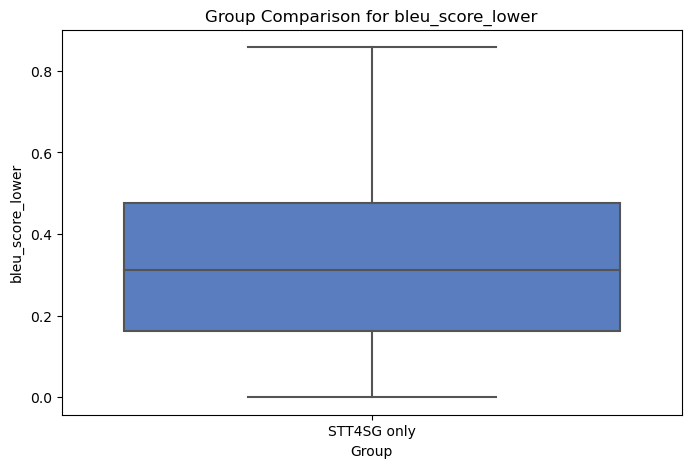

wer_lower       cer_lower  \
                                                       mean   std      mean   
dialect      speaker_id                                                       
Basel        12fb73be-cf60-4794-befb-381682ccda9a     0.659  0.16     0.234   
             1cd99b41-8298-4180-aec6-bb65039c9ed7     0.715  0.23     0.369   
             8050767b-0a0e-43db-8754-2a42e896f7dd     0.588   NaN     0.285   
             8800b4de-fa22-4fdc-9f29-457c4010fd57     0.412   NaN     0.127   
             8f16829d-1a64-4145-927c-d6738a07ea24     0.381   NaN     0.106   
             e903f18d-7bbb-4fb6-aaa3-0f7d965027fb     0.603  0.15     0.253   
             fd72db57-c291-43e6-840e-92e06f83ae56     0.765  0.15     0.324   
Bern         0497b106-6644-42ce-b99e-57f9a6c7fc81     0.367  0.02     0.159   
             24f85b05-10f3-49f3-bfd0-273120e750cb     0.800   NaN     0.315   
             2a4acb33-759e-411f-bbd0-2470080758fb     0.143   NaN     0.043   
             7ca44480-9007-4c1c-8046-aade3c4e6a87     0.626  0.11     0.332   
             887b50f8-215b-4a1d-8f32-13516da6506f     0.412   NaN     0.202   
             ba118975-5963-4495-927a-a78d19dd98c1     0.800  0.20     0.467   
             d2dee463-0eb9-47fa-b739-f1dccd8638f9     0.363  0.22     0.130   
             d9b44aee-da3d-42c8-8ad1-d1029767f05a     0.545   NaN     0.305   
Graubünden   031b0a74-5bdd-47e7-b8b7-9bb58d0e8c72     0.421  0.11     0.151   
             6516567b-0d9b-4853-880c-d5f0327dd384     0.381  0.22     0.150   
             aece75d7-5d2b-47a4-9f87-24962dfd2e38     0.529  0.42     0.225   
             c4f6bcdf-fc02-4fe8-9277-0701cfffebab     0.283  0.02     0.083   
             ce50fa32-dbc4-4f72-bd5f-5128784a5abc     0.095   NaN     0.031   
             d2f85a8f-7c45-48e3-a804-0b192f7f8ad6     0.100   NaN     0.040   
             f2feaf58-1285-4fc1-831d-5c1b013b7e0b     0.143   NaN     0.084   
Innerschweiz 005039b8-898f-48d8-b7cc-8a16bd1055c8     0.346  0.12     0.153   
             4a8346e7-fa21-49b9-9a6f-c69ef828a68c     0.273   NaN     0.094   
             5184dba3-c5e1-4570-ba26-62176e8c8dcc     0.299  0.09     0.080   
             72725555-9e5d-436a-b311-25048bc0c594     0.286   NaN     0.062   
             aa7d9d2c-90d3-41f9-a92e-f07b93765f8b     0.333   NaN     0.132   
             acf67674-c912-42c0-ba3c-f85e2db965ac     0.363  0.27     0.162   
Ostschweiz   684dd9cf-2844-407b-9a7f-12e7b559773f     0.401  0.12     0.146   
             72911186-8b0e-4c0b-af3d-4d8765072930     0.529   NaN     0.238   
             7f4b1ca8-c652-4056-96fb-f02e82182574     0.471   NaN     0.183   
             831d404d-b189-42b6-8120-073c1f8af73c     0.335  0.16     0.133   
             8d167b1c-7f89-4487-a0a9-2bbe08bf0b41     0.143   NaN     0.081   
             a677eda9-7709-4c9d-8656-e7b665140f3b     0.588   NaN     0.271   
Wallis       0b890339-031a-43ef-bc2e-5e8b5ac5e613     0.768  0.08     0.391   
             50e4a935-c887-4c38-aff2-6286aab725d1     0.644  0.19     0.359   
             fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac     0.738  0.31     0.346   
Zürich       3e7e3ad6-938d-40fa-9787-2e9f8c529a66     0.381   NaN     0.205   
             4ee1811c-9884-4261-99cb-2f7346c8ea6e     0.449  0.14     0.175   
             6d34bfbb-2de2-48d9-891d-ae216f9b347b     0.404  0.24     0.179   
             9a9554dd-3ee4-4997-82e6-1d78e0ca3d7f     0.150   NaN     0.047   
             ba826a45-33f8-47ef-9516-a66a201aac29     0.737  0.21     0.434   
             ce8839ae-3b20-491c-8c33-cef08b4def6e     0.590  0.24     0.284   

                                                        bert_score        \
                                                    std       mean   std   
dialect      speaker_id                                                    
Basel        12fb73be-cf60-4794-befb-381682ccda9a  0.02      0.799  0.05   
             1cd99b41-8298-4180-aec6-bb65039c9ed7  0.14      0.793  0.07   
             8050767b-0a0e-43db-875

In [256]:
group_by_speaker(df_snf_long_9_2)

# 3. GPT random

In [386]:
df_gpt_random_7_5 = load_dataframe(model="7_5", eval_type="random")
df_gpt_random_7_6 = load_dataframe(model="7_6", eval_type="random")
df_gpt_random_9_2 = load_dataframe(model="9_2", eval_type="random")

gpt_random = pd.concat([df_gpt_random_7_5, df_gpt_random_7_6, df_gpt_random_9_2], ignore_index=True)

In [347]:
gpt_random.head()

,hypothesis,reference,dialect,sample_id,snf_sample_id,speaker_id,token_count_ref,wer,wer_lower,mer,mer_lower,wil,wil_lower,cer,cer_lower,bert_score,bleu_score,bleu_score_lower,eval_type,model
0,Ich habe das hier an einem Rezept ausprobiert ...,Ich habe gestern ein neues Rezept ausprobiert....,Ostschweiz,99.0,acf67674-c912-42c0-ba3c-f85e2db965ac,predefined,24.0,0.428571,0.380952,0.375000,0.333333,0.534161,0.469979,0.221374,0.213740,0.926730,3.964513e-01,4.126152e-01,random,SRF+STT-SG mixed
1,"Hm. Hast du mir wirklich etwas gezeigt, wenn m...","Kannst du mir kurz zeigen, wie man diese Masch...",Ostschweiz,19.0,acf67674-c912-42c0-ba3c-f85e2db965ac,predefined,12.0,0.700000,0.700000,0.583333,0.583333,0.791667,0.791667,0.482759,0.482759,0.836001,7.825800e-155,7.825800e-155,random,SRF+STT-SG mixed
2,Ich habe heute mit einem Kollegen über die Her...,Heute habe ich mit einem Kollegen über die Her...,Ostschweiz,13.0,acf67674-c912-42c0-ba3c-f85e2db965ac,predefined,30.0,0.185185,0.185185,0.178571,0.178571,0.274348,0.274348,0.120419,0.120419,0.948843,7.488856e-01,7.646603e-01,random,SRF+STT-SG mixed
3,"Es ist ein sehr hoher Preis, um in den Stadträ...","Das Frühstück war lecker, aber ich habe den Ka...",Bern,92.0,acf67674-c912-42c0-ba3c-f85e2db965ac,predefined,12.0,1.100000,1.100000,0.916667,0.916667,0.991667,0.991667,0.766667,0.766667,0.662247,9.788429e-232,9.788429e-232,random,SRF+STT-SG mixed
4,Der Tourismus hat in den letzten Jahren stark ...,Der Tourismus hat in den letzten Jahren stark ...,Basel,98.0,acf67674-c912-42c0-ba3c-f85e2db965ac,predefined,38.0,0.117647,0.117647,0.117647,0.117647,0.197861,0.197861,0.051502,0.051502,0.956426,8.050837e-01,8.050837e-01,random,SRF+STT-SG mixed


## 3.1 Unique Sentences

In [ ]:
unique_sentences_df = df_random_7_6[['reference', 'token_count_ref']].drop_duplicates(subset='reference')
unique_sentences_df['token_count_ref'] = unique_sentences_df['token_count_ref'].astype(int)

In [ ]:
unique_sentences_df.to_csv("gpt_random_sentences.csv", index=False)

In [ ]:
# Remove duplicates to get unique sentences
# Plot the distribution of token count
plt.figure(figsize=(10, 6))
plt.hist(unique_sentences_df['token_count_ref'], 
         bins=range(unique_sentences_df['token_count_ref'].min(), unique_sentences_df['token_count_ref'].max() + 2), 
         edgecolor='black', align='left')

# Customize the plot
plt.title('Distribution of Token Count for Unique Sentences', fontsize=14)
plt.xlabel('Token Count', fontsize=12)
plt.ylabel('Number of Unique Sentences', fontsize=12)
plt.xticks(range(unique_sentences_df['token_count_ref'].min(), unique_sentences_df['token_count_ref'].max() + 1), fontsize=10, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


## 3.2 Dialect based

In [350]:
group_by_dialect(df_gpt_random_7_5)

100


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.422  0.42     0.280  0.32      0.892  0.10   
Bern             0.540  0.55     0.353  0.38      0.870  0.12   
Graubünden       0.519  0.50     0.313  0.31      0.876  0.12   
Innerschweiz     0.430  0.49     0.285  0.35      0.895  0.10   
Ostschweiz       0.551  0.55     0.364  0.40      0.872  0.11   
Wallis           0.789  0.59     0.515  0.39      0.798  0.13   
Zürich           0.582  0.54     0.365  0.35      0.856  0.13   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.499  0.32  
Bern                    0.459  0.34  
Graubünden              0.439  0.36  
Innerschweiz            0.539  0.31  
Ostschweiz              0.430  0.32  
Wallis                  0.272  0.33  
Zürich                  0.404  0.34

In [351]:
group_by_dialect(df_gpt_random_7_6)

100


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.242  0.24     0.124  0.13      0.935  0.07   
Bern             0.226  0.28     0.118  0.15      0.942  0.08   
Graubünden       0.179  0.20     0.092  0.12      0.955  0.06   
Innerschweiz     0.150  0.21     0.075  0.12      0.962  0.06   
Ostschweiz       0.284  0.28     0.139  0.15      0.925  0.08   
Wallis           0.386  0.30     0.212  0.16      0.891  0.09   
Zürich           0.203  0.23     0.105  0.13      0.950  0.06   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.591  0.33  
Bern                    0.651  0.35  
Graubünden              0.661  0.33  
Innerschweiz            0.738  0.31  
Ostschweiz              0.538  0.36  
Wallis                  0.439  0.32  
Zürich                  0.655  0.32

In [352]:
group_by_dialect(df_gpt_random_9_2)

100


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.390  0.30     0.217  0.18      0.891  0.09   
Bern             0.312  0.28     0.170  0.18      0.917  0.09   
Graubünden       0.242  0.23     0.127  0.15      0.940  0.06   
Innerschweiz     0.228  0.24     0.106  0.12      0.942  0.06   
Ostschweiz       0.334  0.30     0.177  0.17      0.905  0.09   
Wallis           0.451  0.32     0.252  0.20      0.869  0.10   
Zürich           0.328  0.31     0.164  0.17      0.913  0.09   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.428  0.34  
Bern                    0.516  0.34  
Graubünden              0.569  0.33  
Innerschweiz            0.607  0.33  
Ostschweiz              0.476  0.34  
Wallis                  0.374  0.35  
Zürich                  0.513  0.36

## 3.3 System-based

700
Levene's Test for Homogeneity of Variance: p=0.0000
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=True shapiro_any_under_p=True
kruskal Results: F=165.8559, p=0.0000
Metric: wer_lower
F-statistic: 122.35949309681646
P-value: 5.479494848098116e-51

Post-hoc analysis for wer_lower:
Tukey results
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj  lower   upper  reject
------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed   0.3092   0.0  0.2615   0.357   True
Mixed + STT-SG FT      STT4SG-only   0.0879   0.0  0.0402  0.1357   True
 SRF+STT-SG mixed      STT4SG-only  -0.2213   0.0 -0.2691 -0.1735   True
------------------------------------------------------------------------




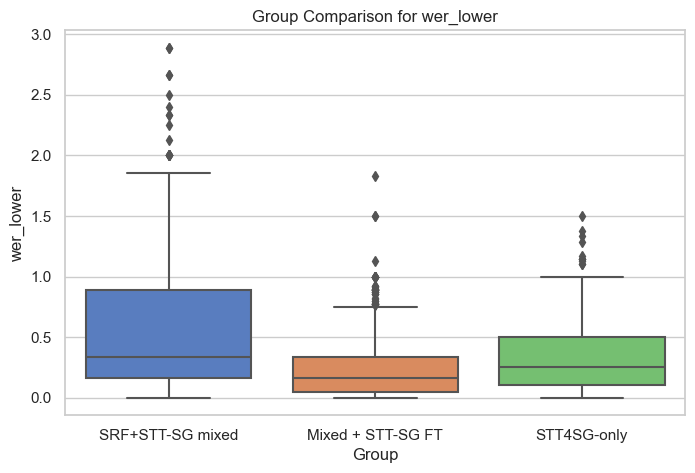

Levene's Test for Homogeneity of Variance: p=0.0000
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=True shapiro_any_under_p=True
kruskal Results: F=207.6987, p=0.0000
Metric: cer_lower
F-statistic: 169.80178451660558
P-value: 4.487576304720495e-69

Post-hoc analysis for cer_lower:
Tukey results
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed   0.2303    0.0  0.1995  0.2611   True
Mixed + STT-SG FT      STT4SG-only   0.0499 0.0005   0.019  0.0807   True
 SRF+STT-SG mixed      STT4SG-only  -0.1804    0.0 -0.2113 -0.1496   True
-------------------------------------------------------------------------




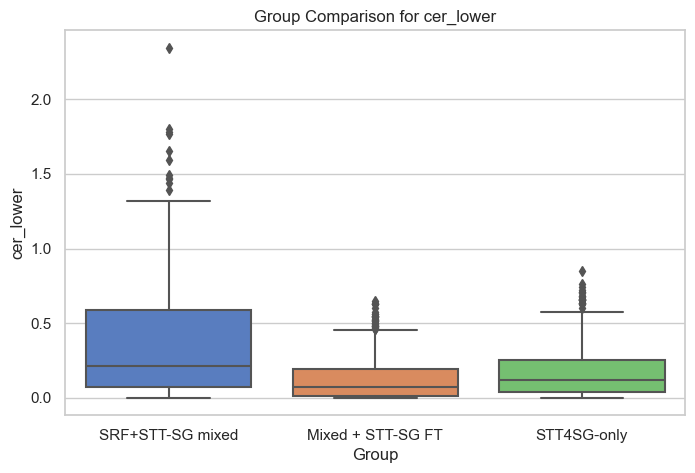

Levene's Test for Homogeneity of Variance: p=0.0000
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=True shapiro_any_under_p=True
kruskal Results: F=170.8438, p=0.0000
Metric: bert_score
F-statistic: 98.89044584605274
P-value: 9.094524895251846e-42

Post-hoc analysis for bert_score:
Tukey results
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj  lower   upper  reject
------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed  -0.0718   0.0 -0.0839 -0.0597   True
Mixed + STT-SG FT      STT4SG-only  -0.0264   0.0 -0.0385 -0.0143   True
 SRF+STT-SG mixed      STT4SG-only   0.0454   0.0  0.0333  0.0575   True
------------------------------------------------------------------------




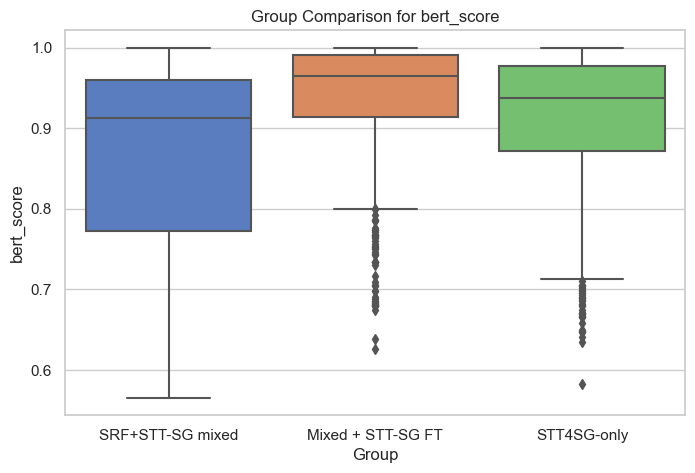

Levene's Test for Homogeneity of Variance: p=0.2213
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=106.7827, p=0.0000
Metric: bleu_score_lower
F-statistic: 46.920576197627504
P-value: 1.1626155490227595e-20

Post-hoc analysis for bleu_score_lower:
Tukey results
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed  -0.1759    0.0 -0.2191 -0.1328   True
Mixed + STT-SG FT      STT4SG-only  -0.1127    0.0 -0.1558 -0.0695   True
 SRF+STT-SG mixed      STT4SG-only   0.0632 0.0017  0.0201  0.1064   True
-------------------------------------------------------------------------




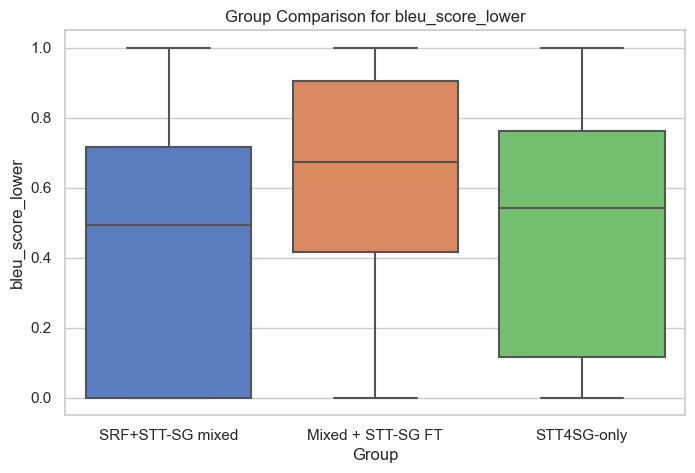

model wer_lower       cer_lower       bert_score        \
                          mean   std      mean   std       mean   std   
0  Mixed + STT-SG FT     0.238  0.26     0.123  0.14      0.937  0.08   
1   SRF+STT-SG mixed     0.548  0.53     0.354  0.36      0.865  0.12   
2        STT4SG-only     0.326  0.29     0.173  0.17      0.911  0.09   

  bleu_score_lower        
              mean   std  
0            0.610  0.34  
1            0.434  0.34  
2            0.498  0.35

In [387]:
group_by_system(gpt_random)

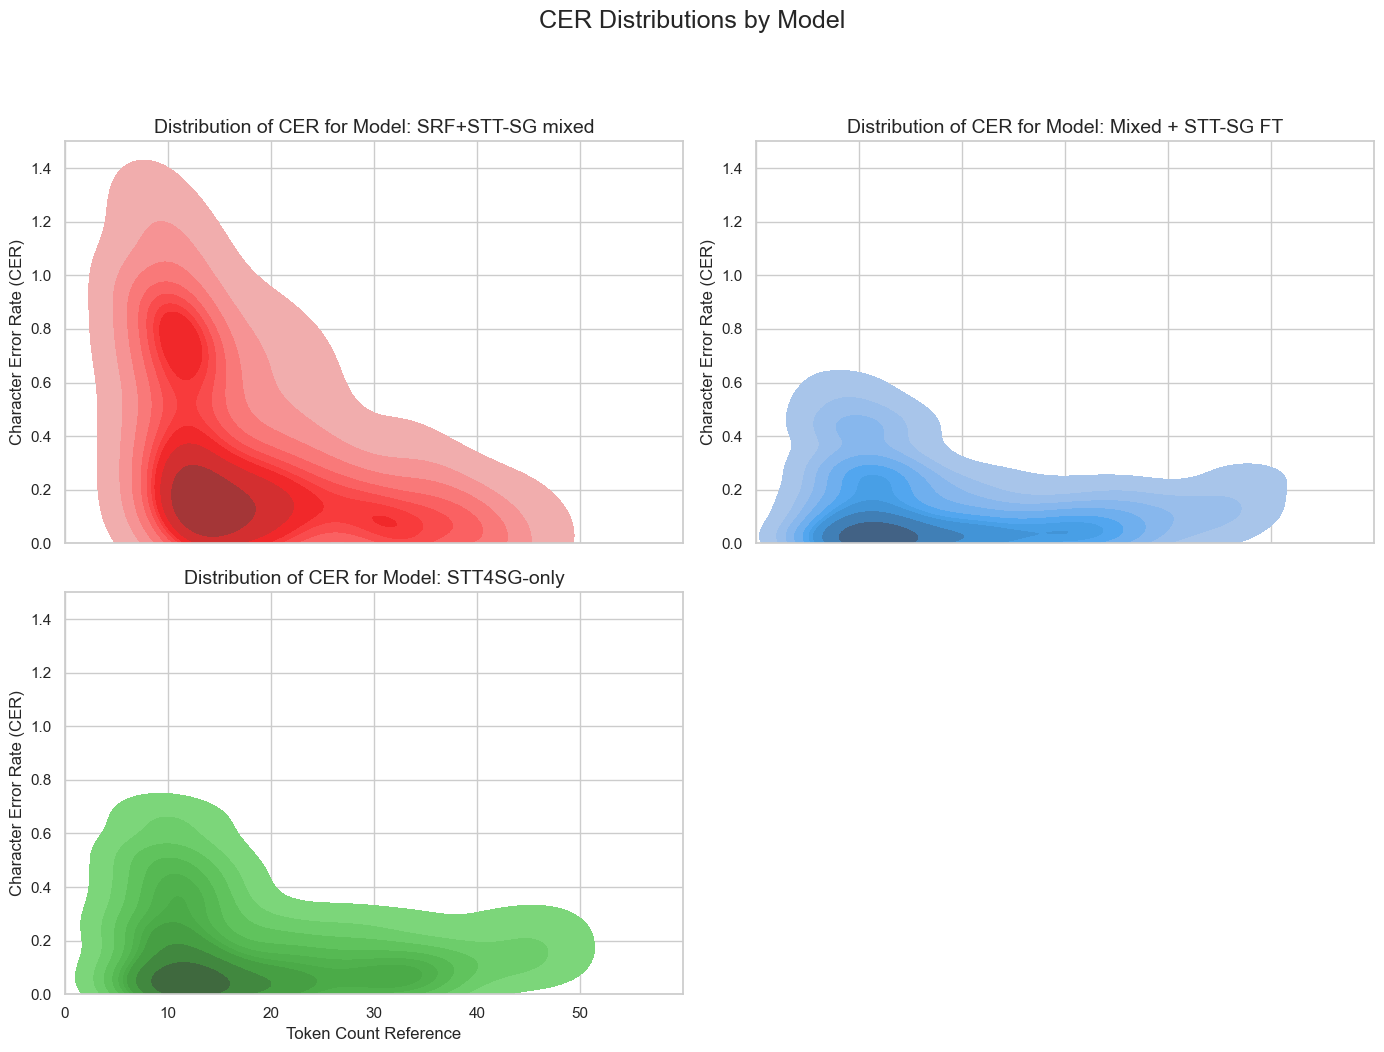

In [365]:
# Set the seaborn style for better visuals
sns.set(style="whitegrid")

# Create a list of unique models
models = gpt_random['model'].unique()

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Flatten the axes array to iterate easily
axes = axes.flatten()
# print(sorted(gpt_random['cer_lower'].unique()))
# Loop through each model and plot in its respective subplot
for i, model in enumerate(models):
    ax = axes[i]
    
    # Filter the data for the current model
    model_data = gpt_random[gpt_random['model'] == model]
    
    # KDE plot for the current model
    sns.kdeplot(data=model_data, x='token_count_ref', y='cer_lower', fill=True, ax=ax, color=sns.color_palette('Set1')[i], clip=(0, None))
    
    # Customize the subplot
    ax.set_title(f'Distribution of CER for Model: {model}', fontsize=14)
    ax.set_xlabel('Token Count Reference', fontsize=12)
    ax.set_ylabel('Character Error Rate (CER)', fontsize=12)
    ax.set_ylim(None, 1.5)
    ax.grid(True)

ax.set_xticks(range(0, 60, 10))
# Remove the empty plot if there's only one model
if len(models) < 4:
    axes[-1].axis('off')

# Add a title for the entire figure
fig.suptitle('CER Distributions by Model', fontsize=18, y=1.05)

# Display the plot
plt.tight_layout()
plt.show()

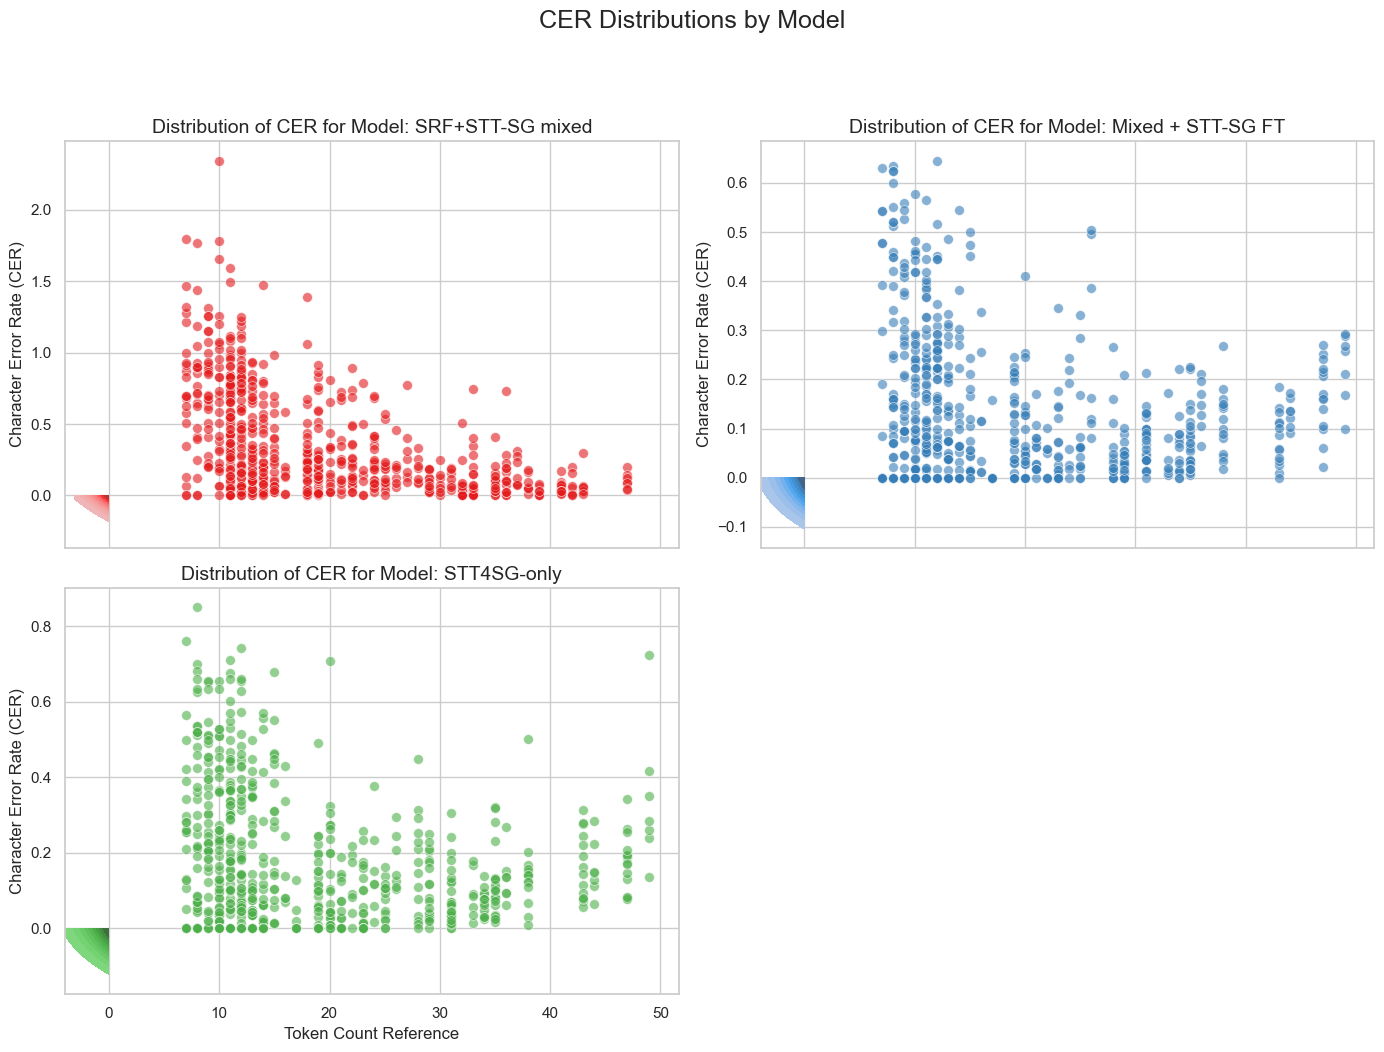

In [359]:

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Flatten the axes array to iterate easily
axes = axes.flatten()

# Loop through each model and plot in its respective subplot
for i, model in enumerate(models):
    ax = axes[i]
    
    # Filter the data for the current model
    model_data = gpt_random[gpt_random['model'] == model]
    
    # KDE plot for the current model, with 'clip' to ensure no negative y-values
    sns.kdeplot(data=model_data, x='token_count_ref', y='cer_lower', fill=True, ax=ax, color=sns.color_palette('Set1')[i], clip=(None, 0))
    
    # Scatter plot for actual CER values
    sns.scatterplot(x='token_count_ref', y='cer_lower', data=model_data, ax=ax, color=sns.color_palette('Set1')[i], alpha=0.6, s=50, marker='o')
    
    # Customize the subplot
    ax.set_title(f'Distribution of CER for Model: {model}', fontsize=14)
    ax.set_xlabel('Token Count Reference', fontsize=12)
    ax.set_ylabel('Character Error Rate (CER)', fontsize=12)
    ax.grid(True)

# Remove the empty plot if there's only one model
if len(models) < 4:
    axes[-1].axis('off')

# Add a title for the entire figure
fig.suptitle('CER Distributions by Model', fontsize=18, y=1.05)

# Display the plot
plt.tight_layout()
plt.show()

# 4. GPT Long

In [420]:
df_gpt_long_7_5 = load_dataframe(model="7_5", eval_type="long")
df_gpt_long_7_6 = load_dataframe(model="7_6", eval_type="long")
df_gpt_long_9_2 = load_dataframe(model="9_2", eval_type="long")

gpt_long = pd.concat([df_gpt_long_7_5, df_gpt_long_7_6, df_gpt_long_9_2], ignore_index=True)

## 4.1 Unique Sentences

In [381]:
df_gpt_long_7_5.head()

,hypothesis,reference,dialect,sample_id,snf_sample_id,speaker_id,token_count_ref,wer,wer_lower,mer,mer_lower,wil,wil_lower,cer,cer_lower,bert_score,bleu_score,bleu_score_lower,eval_type,model
0,Mit der Nachhaltigkeit des Tourismus wächst im...,Das Interesse an nachhaltigem Tourismus wächst...,Innerschweiz,10.0,ChatGPT,5184dba3-c5e1-4570-ba26-62176e8c8dcc,26.0,0.26087,0.217391,0.260870,0.217391,0.453686,0.387524,0.121053,0.110526,0.931722,0.683601,0.730387,long,SRF+STT-SG mixed
1,Der technologische Fortschritt verändert immer...,Der technologische Fortschritt verändert immer...,Graubünden,4.0,ChatGPT,6516567b-0d9b-4853-880c-d5f0327dd384,41.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,long,SRF+STT-SG mixed
2,das Interesse an nachhaltigem Tourismus wächst...,Das Interesse an nachhaltigem Tourismus wächst...,Zürich,10.0,ChatGPT,3e7e3ad6-938d-40fa-9787-2e9f8c529a66,26.0,0.26087,0.173913,0.250000,0.166667,0.413043,0.275362,0.052632,0.031579,0.936034,0.581503,0.673139,long,SRF+STT-SG mixed
3,"Die neue Serie, die ich angefangen habe, war r...","Die neue Serie, die ich angefangen habe, ist r...",Bern,14.0,ChatGPT,d2dee463-0eb9-47fa-b739-f1dccd8638f9,26.0,0.20000,0.200000,0.190476,0.190476,0.311905,0.311905,0.117188,0.117188,0.980017,0.572867,0.572867,long,SRF+STT-SG mixed
4,Ich war in der Stadt und habe dort ein paar ne...,Ich war heute in der Stadt und habe ein paar n...,Wallis,16.0,ChatGPT,fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac,22.0,0.20000,0.200000,0.190476,0.190476,0.277500,0.277500,0.126126,0.126126,0.959110,0.566005,0.566005,long,SRF+STT-SG mixed


In [46]:
unique_sentences_df = df_gpt_long_7_5[['reference', 'token_count_ref']].drop_duplicates(subset='reference')
unique_sentences_df['token_count_ref'] = unique_sentences_df['token_count_ref'].astype(int)

In [47]:
unique_sentences_df.to_csv("gpt_long_sentences.csv", index=False)

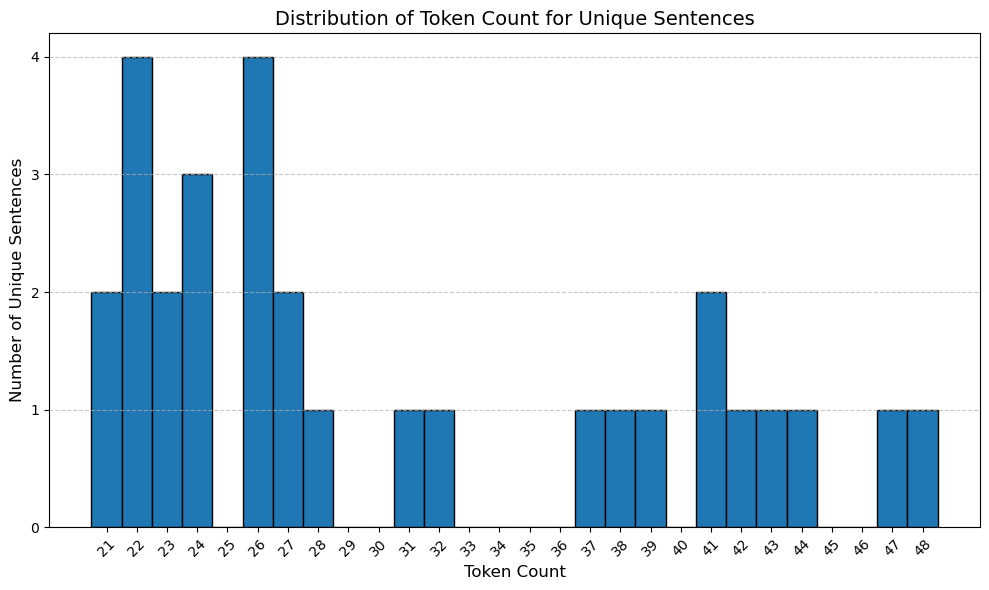

In [51]:
# Plot the distribution of token count
plt.figure(figsize=(10, 6))
plt.hist(unique_sentences_df['token_count_ref'], 
         bins=range(unique_sentences_df['token_count_ref'].min(), unique_sentences_df['token_count_ref'].max() + 2), 
         edgecolor='black', align='left')

# Customize the plot
plt.title('Distribution of Token Count for Unique Sentences', fontsize=14)
plt.xlabel('Token Count', fontsize=12)
plt.ylabel('Number of Unique Sentences', fontsize=12)
plt.xticks(range(unique_sentences_df['token_count_ref'].min(), unique_sentences_df['token_count_ref'].max() + 1), fontsize=10, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(range(0, 5, 1))

# Display the plot
plt.tight_layout()
plt.show()


## 4.2 Dialect based

In [408]:
group_by_dialect(df_gpt_long_7_5)

210


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.229  0.20     0.134  0.14      0.944  0.05   
Bern             0.273  0.26     0.169  0.20      0.929  0.07   
Graubünden       0.236  0.22     0.143  0.16      0.942  0.05   
Innerschweiz     0.233  0.18     0.140  0.13      0.937  0.05   
Ostschweiz       0.279  0.24     0.172  0.17      0.928  0.07   
Wallis           0.416  0.36     0.263  0.26      0.897  0.09   
Zürich           0.326  0.30     0.213  0.24      0.911  0.09   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.644  0.24  
Bern                    0.617  0.27  
Graubünden              0.655  0.23  
Innerschweiz            0.647  0.23  
Ostschweiz              0.611  0.26  
Wallis                  0.489  0.29  
Zürich                  0.568  0.29

In [409]:
group_by_dialect(df_gpt_long_7_6)

210


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.231  0.19     0.132  0.12      0.938  0.06   
Bern             0.221  0.20     0.133  0.13      0.941  0.06   
Graubünden       0.225  0.17     0.131  0.11      0.942  0.05   
Innerschweiz     0.151  0.15     0.095  0.12      0.960  0.05   
Ostschweiz       0.222  0.16     0.125  0.10      0.941  0.05   
Wallis           0.444  0.25     0.272  0.17      0.872  0.08   
Zürich           0.248  0.20     0.149  0.14      0.932  0.06   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.629  0.26  
Bern                    0.647  0.25  
Graubünden              0.639  0.23  
Innerschweiz            0.745  0.20  
Ostschweiz              0.644  0.23  
Wallis                  0.386  0.26  
Zürich                  0.611  0.26

In [384]:
group_by_dialect(df_gpt_long_9_2)

210


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.336  0.20     0.189  0.12      0.908  0.06   
Bern             0.331  0.25     0.196  0.16      0.907  0.08   
Graubünden       0.257  0.24     0.155  0.17      0.930  0.08   
Innerschweiz     0.196  0.17     0.117  0.14      0.948  0.06   
Ostschweiz       0.232  0.18     0.132  0.11      0.941  0.05   
Wallis           0.451  0.23     0.273  0.15      0.864  0.08   
Zürich           0.316  0.21     0.185  0.15      0.914  0.07   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.475  0.25  
Bern                    0.528  0.28  
Graubünden              0.614  0.26  
Innerschweiz            0.678  0.22  
Ostschweiz              0.620  0.25  
Wallis                  0.366  0.27  
Zürich                  0.523  0.27

## 4.3 System Based

1290
Levene's Test for Homogeneity of Variance: p=0.9560
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=20.8382, p=0.0000
Metric: wer_lower
F-statistic: 3.1633510761333774
P-value: 0.04239324882251902

Post-hoc analysis for wer_lower:
Tukey results
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
      group1           group2      meandiff p-adj  lower  upper  reject
-----------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed      0.0   1.0 -0.0223 0.0223  False
Mixed + STT-SG FT      STT4SG-only   0.0207 0.075 -0.0016 0.0431  False
 SRF+STT-SG mixed      STT4SG-only   0.0207 0.075 -0.0016 0.0431  False
-----------------------------------------------------------------------




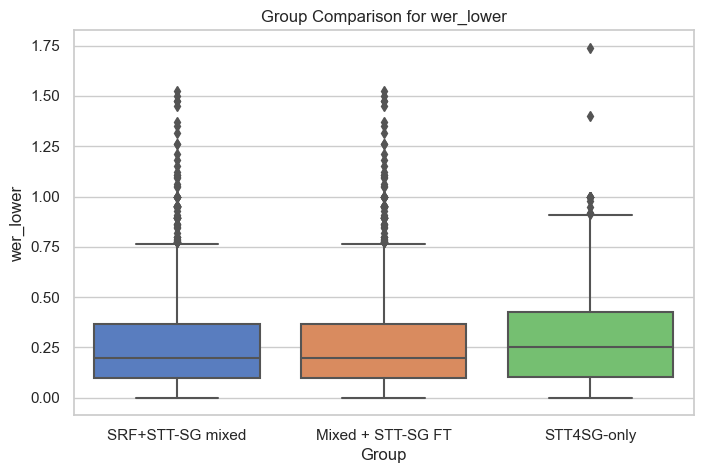

Levene's Test for Homogeneity of Variance: p=0.4559
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=14.8817, p=0.0006
Metric: cer_lower
F-statistic: 0.2221930865269869
P-value: 0.8007709558459057

Levene's Test for Homogeneity of Variance: p=0.0071
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=True shapiro_any_under_p=True
kruskal Results: F=26.5727, p=0.0000
Metric: bert_score
F-statistic: 9.52220409544373
P-value: 7.493922794917071e-05

Post-hoc analysis for bert_score:
Tukey results
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower   upper  reject
-----------

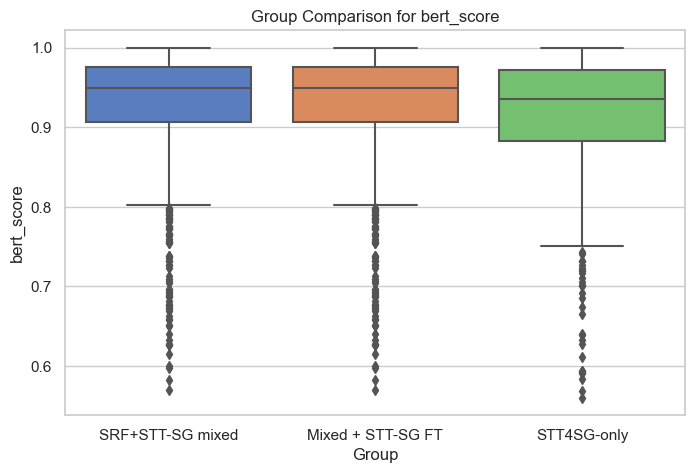

Levene's Test for Homogeneity of Variance: p=0.0467
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=True shapiro_any_under_p=True
kruskal Results: F=47.6771, p=0.0000
Metric: bleu_score_lower
F-statistic: 22.20446584064176
P-value: 2.580327158959912e-10

Post-hoc analysis for bleu_score_lower:
Tukey results
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj  lower   upper  reject
------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed      0.0   1.0 -0.0244  0.0244  False
Mixed + STT-SG FT      STT4SG-only  -0.0599   0.0 -0.0843 -0.0356   True
 SRF+STT-SG mixed      STT4SG-only  -0.0599   0.0 -0.0843 -0.0356   True
------------------------------------------------------------------------




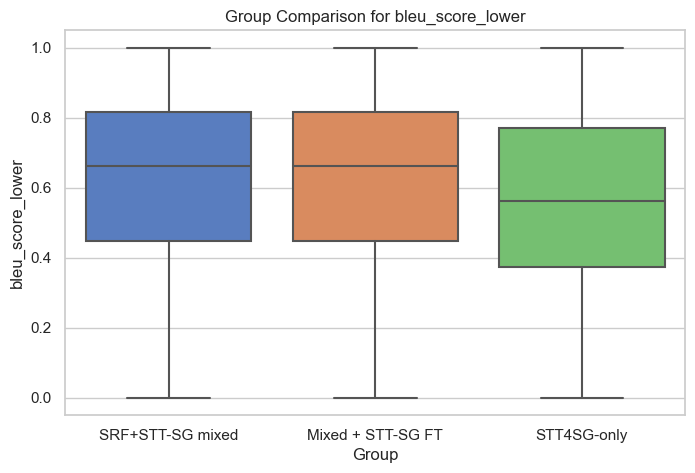

model wer_lower       cer_lower       bert_score        \
                          mean   std      mean   std       mean   std   
0  Mixed + STT-SG FT     0.273  0.25     0.168  0.19      0.930  0.07   
1   SRF+STT-SG mixed     0.273  0.25     0.168  0.19      0.930  0.07   
2        STT4SG-only     0.293  0.22     0.172  0.15      0.919  0.07   

  bleu_score_lower        
              mean   std  
0            0.615  0.26  
1            0.615  0.26  
2            0.555  0.27

In [406]:
group_by_system(gpt_long)

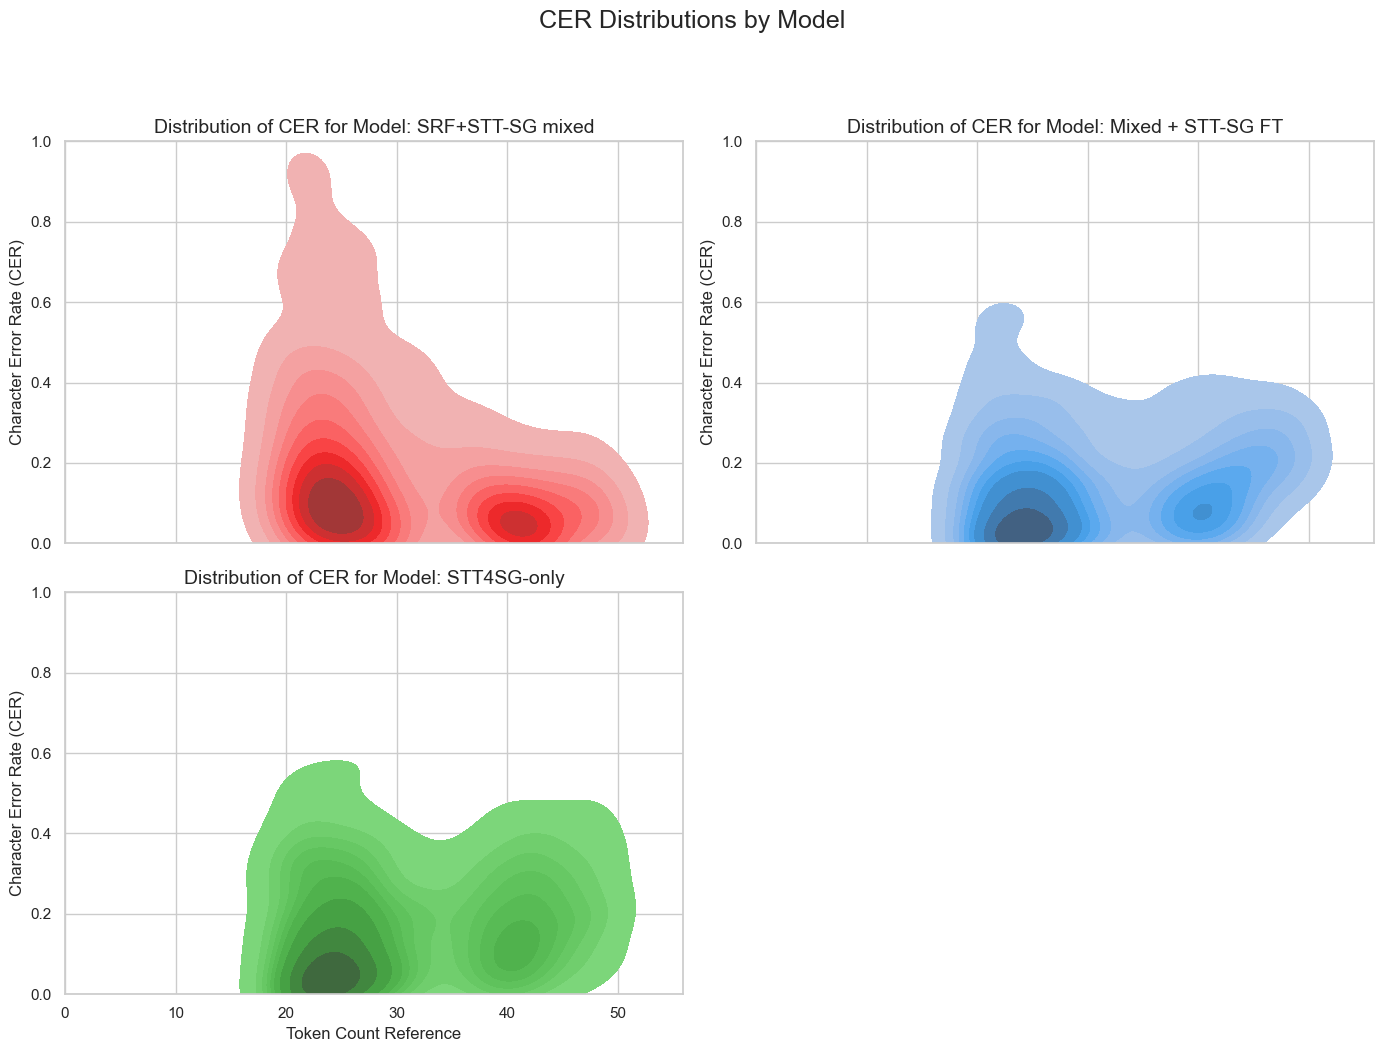

In [389]:
# Set the seaborn style for better visuals
sns.set(style="whitegrid")

# Create a list of unique models
models = gpt_long['model'].unique()

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Flatten the axes array to iterate easily
axes = axes.flatten()
# print(sorted(gpt_random['cer_lower'].unique()))
# Loop through each model and plot in its respective subplot
for i, model in enumerate(models):
    ax = axes[i]
    
    # Filter the data for the current model
    model_data = gpt_long[gpt_long['model'] == model]
    
    # KDE plot for the current model
    sns.kdeplot(data=model_data, x='token_count_ref', y='cer_lower', fill=True, ax=ax, color=sns.color_palette('Set1')[i], clip=(0, None))
    
    # Customize the subplot
    ax.set_title(f'Distribution of CER for Model: {model}', fontsize=14)
    ax.set_xlabel('Token Count Reference', fontsize=12)
    ax.set_ylabel('Character Error Rate (CER)', fontsize=12)
    ax.set_ylim(None, 1.0)
    ax.grid(True)

ax.set_xticks(range(0, 60, 10))
# Remove the empty plot if there's only one model
if len(models) < 4:
    axes[-1].axis('off')

# Add a title for the entire figure
fig.suptitle('CER Distributions by Model', fontsize=18, y=1.05)

# Display the plot
plt.tight_layout()
plt.show()

In [436]:
group_by_speaker(gpt_long)

wer_lower  \
                                                                    mean   
dialect speaker_id                           model                         
Basel   12fb73be-cf60-4794-befb-381682ccda9a Mixed + STT-SG FT     0.166   
                                             SRF+STT-SG mixed      0.246   
                                             STT4SG-only           0.292   
        1cd99b41-8298-4180-aec6-bb65039c9ed7 Mixed + STT-SG FT     0.374   
                                             SRF+STT-SG mixed      0.215   
...                                                                  ...   
Zürich  ba826a45-33f8-47ef-9516-a66a201aac29 SRF+STT-SG mixed      0.425   
                                             STT4SG-only           0.261   
        ce8839ae-3b20-491c-8c33-cef08b4def6e Mixed + STT-SG FT     0.398   
                                             SRF+STT-SG mixed      0.281   
                                             STT4SG-only           0.254   

                                                                      \
                                                                 std   
dialect speaker_id                           model                     
Basel   12fb73be-cf60-4794-befb-381682ccda9a Mixed + STT-SG FT  0.12   
                                             SRF+STT-SG mixed   0.18   
                                             STT4SG-only        0.18   
        1cd99b41-8298-4180-aec6-bb65039c9ed7 Mixed + STT-SG FT  0.21   
                                             SRF+STT-SG mixed   0.11   
...                                                              ...   
Zürich  ba826a45-33f8-47ef-9516-a66a201aac29 SRF+STT-SG mixed   0.32   
                                             STT4SG-only        0.17   
        ce8839ae-3b20-491c-8c33-cef08b4def6e Mixed + STT-SG FT  0.19   
                                             SRF+STT-SG mixed   0.34   
                                             STT4SG-only        0.19   

                                                               cer_lower  \
                                                                    mean   
dialect speaker_id                           model                         
Basel   12fb73be-cf60-4794-befb-381682ccda9a Mixed + STT-SG FT     0.098   
                                             SRF+STT-SG mixed      0.135   
                                             STT4SG-only           0.173   
        1cd99b41-8298-4180-aec6-bb65039c9ed7 Mixed + STT-SG FT     0.205   
                                             SRF+STT-SG mixed      0.114   
...                                                                  ...   
Zürich  ba826a45-33f8-47ef-9516-a66a201aac29 SRF+STT-SG mixed      0.273   
                                             STT4SG-only           0.160   
        ce8839ae-3b20-491c-8c33-cef08b4def6e Mixed + STT-SG FT     0.242   
                                             SRF+STT-SG mixed      0.167   
                                             STT4SG-only           0.139   

                                                                      \
                                                                 std   
dialect speaker_id                           model                     
Basel   12fb73be-cf60-4794-befb-381682ccda9a Mixed + STT-SG FT  0.08   
                                             SRF+STT-SG mixed   0.10   
                                             STT4SG-only        0.13   
        1cd99b41-8298-4180-aec6-bb65039c9ed7 Mixed + STT-SG FT  0.13   
                                             SRF+STT-SG mixed   0.07   
...                                                              ...   
Zürich  ba826a45-33f8-47ef-9516-a66a201aac29 SRF+STT-SG mixed   0.24   
                                             STT4SG-only        0.13   
        ce8839ae-3b20-491c-8c33-cef08b4def6e Mixed + STT-SG FT  0.14   
                                             SRF+STT-SG mixe

# 5. Overall

In [390]:
model_7_5 = pd.concat([df_snf_short_7_5, df_snf_long_7_5, df_gpt_random_7_5, df_gpt_long_7_5], ignore_index=True)
model_7_6 = pd.concat([df_snf_short_7_6, df_snf_long_7_6, df_gpt_random_7_6, df_gpt_long_7_6], ignore_index=True)
model_9_2 = pd.concat([df_snf_short_9_2, df_snf_long_9_2, df_gpt_random_9_2, df_gpt_long_9_2], ignore_index=True)

combined = pd.concat([model_7_5, model_7_6, model_9_2], ignore_index=True)

## 5.1 dialect based

In [391]:
group_by_dialect(model_7_5)

340


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.306  0.30     0.186  0.22      0.923  0.08   
Bern             0.373  0.40     0.234  0.28      0.904  0.10   
Graubünden       0.332  0.36     0.197  0.23      0.918  0.09   
Innerschweiz     0.319  0.34     0.194  0.24      0.918  0.08   
Ostschweiz       0.386  0.40     0.240  0.28      0.903  0.09   
Wallis           0.629  0.57     0.403  0.42      0.841  0.12   
Zürich           0.444  0.44     0.277  0.30      0.885  0.11   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.581  0.28  
Bern                    0.551  0.31  
Graubünden              0.579  0.30  
Innerschweiz            0.589  0.28  
Ostschweiz              0.530  0.30  
Wallis                  0.361  0.33  
Zürich                  0.485  0.32

In [392]:
group_by_dialect(model_7_6)

340


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.262  0.24     0.140  0.13      0.927  0.07   
Bern             0.241  0.23     0.135  0.14      0.934  0.07   
Graubünden       0.229  0.19     0.124  0.12      0.939  0.06   
Innerschweiz     0.168  0.19     0.093  0.12      0.955  0.06   
Ostschweiz       0.264  0.23     0.136  0.13      0.929  0.07   
Wallis           0.447  0.28     0.251  0.16      0.869  0.09   
Zürich           0.259  0.24     0.142  0.14      0.929  0.07   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.582  0.30  
Bern                    0.624  0.30  
Graubünden              0.619  0.28  
Innerschweiz            0.714  0.27  
Ostschweiz              0.582  0.30  
Wallis                  0.375  0.30  
Zürich                  0.592  0.31

In [393]:
group_by_dialect(model_9_2)

340


wer_lower       cer_lower       bert_score        \
                  mean   std      mean   std       mean   std   
dialect                                                         
Basel            0.382  0.25     0.207  0.15      0.894  0.08   
Bern             0.345  0.27     0.198  0.17      0.902  0.09   
Graubünden       0.266  0.24     0.149  0.17      0.928  0.08   
Innerschweiz     0.224  0.21     0.117  0.13      0.939  0.07   
Ostschweiz       0.285  0.24     0.152  0.14      0.922  0.07   
Wallis           0.486  0.29     0.275  0.18      0.855  0.10   
Zürich           0.343  0.26     0.186  0.16      0.905  0.08   

             bleu_score_lower        
                         mean   std  
dialect                              
Basel                   0.432  0.29  
Bern                    0.501  0.31  
Graubünden              0.582  0.29  
Innerschweiz            0.625  0.28  
Ostschweiz              0.544  0.30  
Wallis                  0.339  0.31  
Zürich                  0.492  0.31

## 5.2 System based

In [428]:
group_by_speaker(combined)

wer_lower  \
                                                                     std   
dialect speaker_id                           model                         
Basel   12fb73be-cf60-4794-befb-381682ccda9a Mixed + STT-SG FT      0.35   
                                             SRF+STT-SG mixed       0.17   
                                             STT4SG-only            0.23   
        1cd99b41-8298-4180-aec6-bb65039c9ed7 Mixed + STT-SG FT      0.24   
                                             SRF+STT-SG mixed       0.20   
...                                                                  ...   
Zürich  ce8839ae-3b20-491c-8c33-cef08b4def6e SRF+STT-SG mixed       0.37   
                                             STT4SG-only            0.23   
        predefined                           Mixed + STT-SG FT      0.21   
                                             SRF+STT-SG mixed       0.54   
                                             STT4SG-only            0.31   

                                                               cer_lower  \
                                                                     std   
dialect speaker_id                           model                         
Basel   12fb73be-cf60-4794-befb-381682ccda9a Mixed + STT-SG FT      0.16   
                                             SRF+STT-SG mixed       0.10   
                                             STT4SG-only            0.13   
        1cd99b41-8298-4180-aec6-bb65039c9ed7 Mixed + STT-SG FT      0.20   
                                             SRF+STT-SG mixed       0.15   
...                                                                  ...   
Zürich  ce8839ae-3b20-491c-8c33-cef08b4def6e SRF+STT-SG mixed       0.26   
                                             STT4SG-only            0.14   
        predefined                           Mixed + STT-SG FT      0.14   
                                             SRF+STT-SG mixed       0.35   
                                             STT4SG-only            0.17   

                                                               bert_score  \
                                                                      std   
dialect speaker_id                           model                          
Basel   12fb73be-cf60-4794-befb-381682ccda9a Mixed + STT-SG FT       0.08   
                                             SRF+STT-SG mixed        0.05   
                                             STT4SG-only             0.07   
        1cd99b41-8298-4180-aec6-bb65039c9ed7 Mixed + STT-SG FT       0.13   
                                             SRF+STT-SG mixed        0.05   
...                                                                   ...   
Zürich  ce8839ae-3b20-491c-8c33-cef08b4def6e SRF+STT-SG mixed        0.09   
                                             STT4SG-only             0.07   
        predefined                           Mixed + STT-SG FT       0.06   
                                             SRF+STT-SG mixed        0.13   
                                             STT4SG-only             0.09   

                                                               bleu_score_lower  
                                                                            std  
dialect speaker_id                           model                               
Basel   12fb73be-cf60-4794-befb-381682ccda9a Mixed + STT-SG FT             0.20  
                                             SRF+STT-SG mixed              0.24  
                                             STT4SG-only                   0.26  
        1cd99b41-8298-4180-aec6-bb65039c9ed7 Mixed + STT-SG FT             0.16  
                                             SRF+STT-SG mixed              0.22  
...                                                                         ...  
Zürich  ce8839ae-3b20-491c-8c33-cef08b4def6e SRF+STT-SG mixed              0.33  
                                  

2200
Levene's Test for Homogeneity of Variance: p=0.0000
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=True shapiro_any_under_p=True
kruskal Results: F=122.6489, p=0.0000
Metric: wer_lower
F-statistic: 91.86280702053791
P-value: 4.466100566503896e-40

Post-hoc analysis for wer_lower:
Tukey results
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj  lower   upper  reject
------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed   0.1275   0.0  0.1055  0.1496   True
Mixed + STT-SG FT      STT4SG-only   0.0682   0.0  0.0461  0.0903   True
 SRF+STT-SG mixed      STT4SG-only  -0.0593   0.0 -0.0814 -0.0372   True
------------------------------------------------------------------------




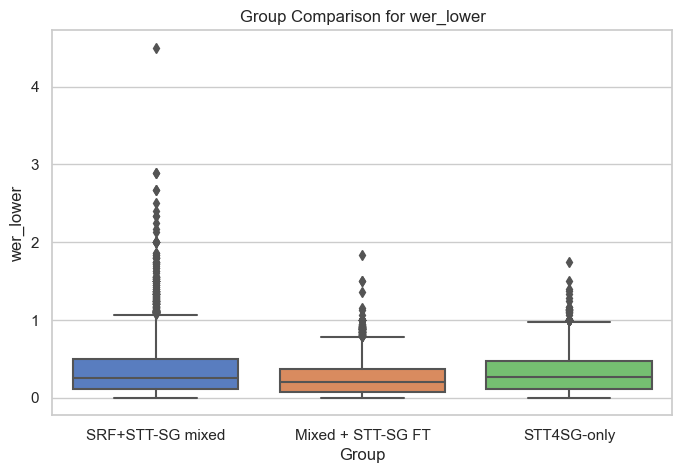

Levene's Test for Homogeneity of Variance: p=0.0000
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=True shapiro_any_under_p=True
kruskal Results: F=127.9701, p=0.0000
Metric: cer_lower
F-statistic: 126.07370574069347
P-value: 1.850708831154751e-54

Post-hoc analysis for cer_lower:
Tukey results
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj  lower   upper  reject
------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed   0.0983   0.0  0.0837  0.1129   True
Mixed + STT-SG FT      STT4SG-only   0.0391   0.0  0.0245  0.0537   True
 SRF+STT-SG mixed      STT4SG-only  -0.0592   0.0 -0.0738 -0.0446   True
------------------------------------------------------------------------




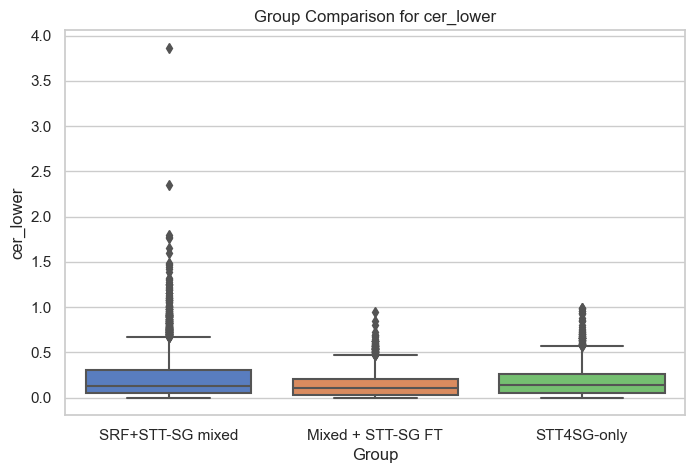

Levene's Test for Homogeneity of Variance: p=0.0000
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=True shapiro_any_under_p=True
kruskal Results: F=120.6589, p=0.0000
Metric: bert_score
F-statistic: 61.24263039363078
P-value: 4.431626052677638e-27

Post-hoc analysis for bert_score:
Tukey results
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed  -0.0272    0.0 -0.0332 -0.0212   True
Mixed + STT-SG FT      STT4SG-only  -0.0204    0.0 -0.0264 -0.0144   True
 SRF+STT-SG mixed      STT4SG-only   0.0068 0.0206  0.0008  0.0128   True
-------------------------------------------------------------------------




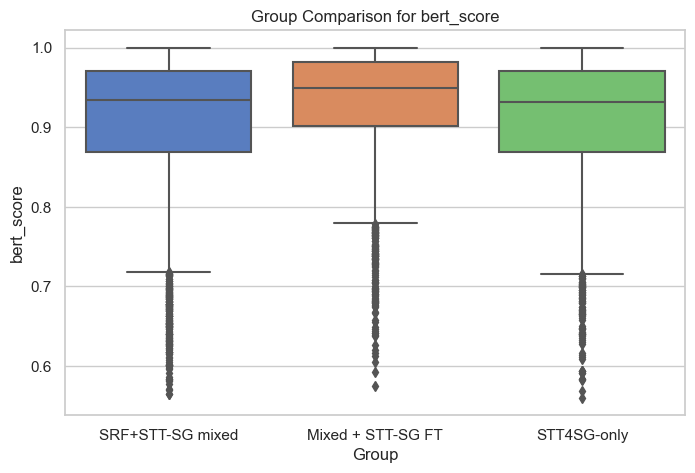

Levene's Test for Homogeneity of Variance: p=0.1004
Shapiro-Wilk Test for Normality (SRF+STT-SG mixed): p=0.0000
Shapiro-Wilk Test for Normality (Mixed + STT-SG FT): p=0.0000
Shapiro-Wilk Test for Normality (STT4SG-only): p=0.0000
levene_below_0_05=False shapiro_any_under_p=True
kruskal Results: F=96.4606, p=0.0000
Metric: bleu_score_lower
F-statistic: 45.003353272841174
P-value: 3.8674210587642875e-20

Post-hoc analysis for bleu_score_lower:
Tukey results
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2      meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------
Mixed + STT-SG FT SRF+STT-SG mixed  -0.0603    0.0  -0.082 -0.0386   True
Mixed + STT-SG FT      STT4SG-only  -0.0855    0.0 -0.1072 -0.0638   True
 SRF+STT-SG mixed      STT4SG-only  -0.0252 0.0179 -0.0469 -0.0035   True
-------------------------------------------------------------------------




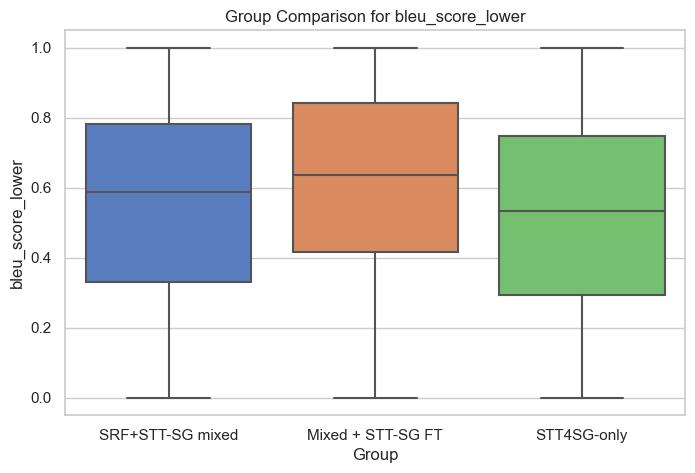

model wer_lower       cer_lower       bert_score        \
                          mean   std      mean   std       mean   std   
0  Mixed + STT-SG FT     0.259  0.24     0.141  0.14      0.929  0.07   
1   SRF+STT-SG mixed     0.386  0.41     0.239  0.29      0.902  0.10   
2        STT4SG-only     0.327  0.26     0.180  0.16      0.909  0.08   

  bleu_score_lower        
              mean   std  
0            0.594  0.30  
1            0.534  0.31  
2            0.509  0.31

In [395]:
group_by_system(combined)

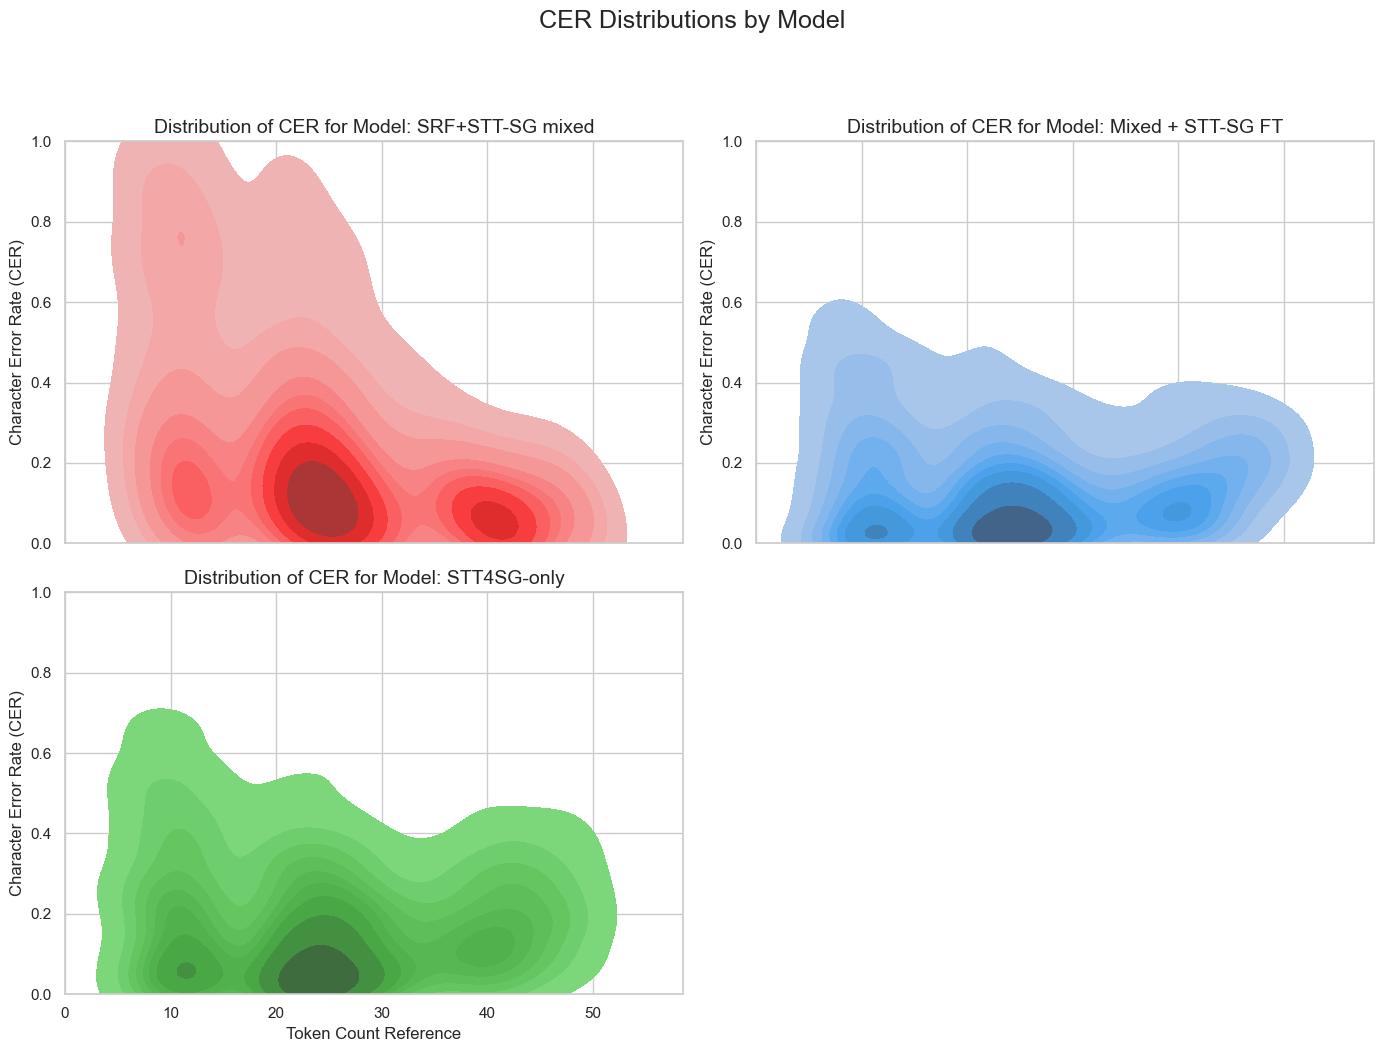

In [396]:
# Set the seaborn style for better visuals
sns.set(style="whitegrid")

# Create a list of unique models
models = combined['model'].unique()

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Flatten the axes array to iterate easily
axes = axes.flatten()
# print(sorted(gpt_random['cer_lower'].unique()))
# Loop through each model and plot in its respective subplot
for i, model in enumerate(models):
    ax = axes[i]
    
    # Filter the data for the current model
    model_data = combined[combined['model'] == model]
    
    # KDE plot for the current model
    sns.kdeplot(data=model_data, x='token_count_ref', y='cer_lower', fill=True, ax=ax, color=sns.color_palette('Set1')[i], clip=(0, None))
    
    # Customize the subplot
    ax.set_title(f'Distribution of CER for Model: {model}', fontsize=14)
    ax.set_xlabel('Token Count Reference', fontsize=12)
    ax.set_ylabel('Character Error Rate (CER)', fontsize=12)
    ax.set_ylim(None, 1.0)
    ax.grid(True)

ax.set_xticks(range(0, 60, 10))
# Remove the empty plot if there's only one model
if len(models) < 4:
    axes[-1].axis('off')

# Add a title for the entire figure
fig.suptitle('CER Distributions by Model', fontsize=18, y=1.05)

# Display the plot
plt.tight_layout()
plt.show()